# Importation de nos modules 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline 

# Téléchargement de ma base

In [ ]:
#telechargement de ma table de travail
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P3/en.openfoodfacts.org.products.csv',sep='\t',low_memory=False)

# Etudes valeurs manquantes

In [ ]:
pd.set_option('display.max_row',183) 
#pour afficher toutes les colonnes pour les lignes display.max_row
PVm=((data.isnull().sum())/data.shape[0])*100
#nous voyons qu'il ya beaucoup de valeurs manquantes sur certaines colonnes 
data.shape


(1555491, 183)

In [ ]:
PVm #pourcentage des valeurs manquantes 

code                                            0.000000
url                                             0.000000
creator                                         0.000257
created_t                                       0.000000
created_datetime                                0.000000
last_modified_t                                 0.000000
last_modified_datetime                          0.000000
product_name                                    5.114205
generic_name                                   93.062705
quantity                                       72.535103
packaging                                      84.045231
packaging_tags                                 84.046066
packaging_text                                 99.930569
brands                                         44.993317
brands_tags                                    44.996917
categories                                     49.218607
categories_tags                                49.218735
categories_en                  

## Fonction Trace Valeur manquante 

In [ ]:
#fonction qui donne le taux de remplissage et nous dit les colonnes vides
#nous renseigne aussi le taux de remplissage 
#le taux de valeurs manquantes
def TraceValeurMissing(base):

  col_vides=[]
  for col in base.columns:
      if base[col].isnull().all():
        #all Renvoie True si au moins 
        #un élément de iterable est vrai. False est renvoyé dans 
        #le cas où iterable est vide
          col_vides.append(col)
  print ('les colonnes vides sont:\n\n')
  display(col_vides)#affiche tete de table
  t=pd.DataFrame(index=['number of missing values', 'number of values','fill_rate'], columns=base.columns )
  for col in base.columns:
      nb_nan=base[col].isnull().sum()
      t.loc['number of missing values',col]=nb_nan              
      t.loc['number of values', col]= base.shape[0]-nb_nan 
      t.loc['fill_rate', col]=(base.shape[0]-nb_nan)/(base.shape[0]*1.0)
      #taux de remplissage
  display(t)#pd.set
  dico = {'columns': base.columns, 'fill_rate': t.loc['fill_rate', base.columns]*100, 'missing_values': 100-t.loc['fill_rate',base.columns]*100}
  tr = pd.DataFrame(dico)
  barWidth=0.85#largeur des barres
  plt.figure(figsize=(8,10))
  plt.gca().invert_yaxis()#pour creer des axes polaires valeur d'une graduation
  #taille des graduations
#plt.barh creation dune barre horizontale
  plt.barh(tr['columns'], tr['fill_rate'], color='#a3acff')
  plt.barh(tr['columns'], tr['missing_values'], left=tr['fill_rate'], color ='#b5ffb9')
  plt.title('Taux de remplissage', fontsize=30)
  plt.yticks(fontsize=10)
  plt.ylabel('columns', fontdict={'fontsize' : 20})
  plt.xlabel('fill rate(%)', fontdict={'fontsize' : 20})

  plt.axvline(x=80, color='b')
  plt.text(82, -1, '>80%', color='b')
  plt.axvline(x=20, color='r')
  plt.text(12, -1, '<20%', color='r')
  plt.grid(True)


les colonnes vides sont:




['cities',
 'allergens_en',
 'no_nutriments',
 'additives',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 '-lignoceric-acid_100g',
 '-melissic-acid_100g',
 '-elaidic-acid_100g',
 '-gondoic-acid_100g',
 '-mead-acid_100g',
 '-erucic-acid_100g',
 '-nervonic-acid_100g',
 'water-hardness_100g']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,...,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
number of missing values,0,0,4,0,0,0,0,79551,1447582,1128277,1307316,1307329,1554411,699867,699923,765591,765593,765593,1489598,1489709,1489709,1451302,1451348,1204408,1204384,1204384,1452109,1452138,1490804,1555491,1485736,1411894,1343624,5158,5162,5162,894716,1380571,1555491,1468466,...,1547064,1543126,1554514,1549595,1555380,1555129,1463964,1554839,1286482,1541969,1291382,1541038,1545469,1551277,1551519,1555183,1553087,1555319,1555260,1553472,1555101,1555350,1555320,1546812,1555201,1543873,1555184,1549789,1555487,1555054,1544366,938444,1555466,1555488,1555491,1555452,1553778,1555465,1555446,1555471
number of values,1555491,1555491,1555487,1555491,1555491,1555491,1555491,1475940,107909,427214,248175,248162,1080,855624,855568,789900,789898,789898,65893,65782,65782,104189,104143,351083,351107,351107,103382,103353,64687,0,69755,143597,211867,1550333,1550329,1550329,660775,174920,0,87025,...,8427,12365,977,5896,111,362,91527,652,269009,13522,264109,14453,10022,4214,3972,308,2404,172,231,2019,390,141,171,8679,290,11618,307,5702,4,437,11125,617047,25,3,0,39,1713,26,45,20
fill_rate,1,1,0.999997,1,1,1,1,0.948858,0.069373,0.274649,0.159548,0.159539,0.000694315,0.550067,0.550031,0.507814,0.507813,0.507813,0.0423615,0.0422902,0.0422902,0.0669814,0.0669518,0.225706,0.225721,0.225721,0.0664626,0.066444,0.0415862,0,0.0448444,0.0923162,0.136206,0.996684,0.996681,0.996681,0.424802,0.112453,0,0.055947,...,0.00541758,0.00794926,0.000628097,0.00379044,7.13601e-05,0.000232724,0.0588412,0.00041916,0.172942,0.00869308,0.169791,0.0092916,0.00644298,0.00270911,0.00255353,0.000198008,0.00154549,0.000110576,0.000148506,0.00129798,0.000250725,9.06466e-05,0.000109933,0.00557959,0.000186436,0.00746902,0.000197365,0.00366572,2.57154e-06,0.00028094,0.00715208,0.39669,1.60721e-05,1.92865e-06,0,2.50725e-05,0.00110126,1.6715e-05,2.89298e-05,1.28577e-05


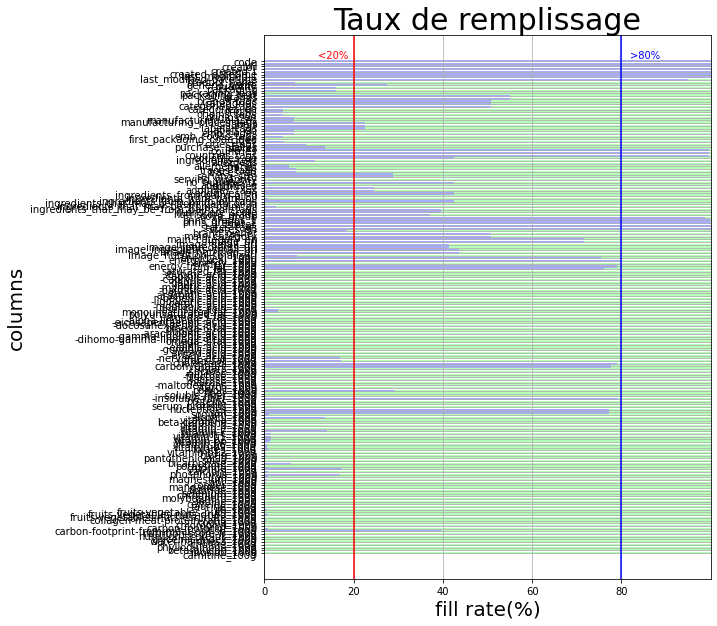

In [ ]:
TraceValeurMissing(data)#appel de la fonction sur notre dataframe 

## Etude des pourcentages de valeurs manquantes 

## Fonction qui calcule le % de missing values

In [ ]:
#fonction qui calcule le nombre de pourcentage de valeur manquante
def Missing(Base):
  PVm=((Base.isnull().sum())/Base.shape[0])*100
  PVm.sort_values(ascending=True)
  return PVm


In [ ]:
p=Missing(data)

In [ ]:
#création d'un tableau de valeurs manquantes 
df=pd.DataFrame(p.index,columns=['Variables'])
df['% missing']=p.values
df

,Variables,% missing
0,code,0.000000
1,url,0.000000
2,creator,0.000257
3,created_t,0.000000
4,created_datetime,0.000000
5,last_modified_t,0.000000
6,last_modified_datetime,0.000000
7,product_name,5.114205
8,generic_name,93.062705
9,quantity,72.535103


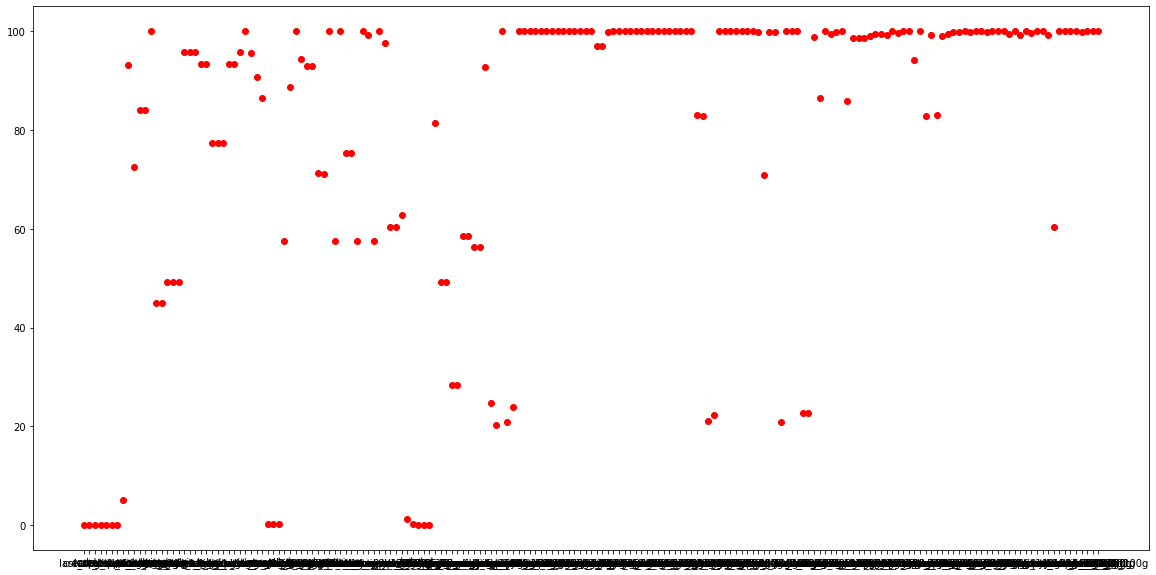

In [ ]:
df['% missing'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
x=df['Variables']
y=df['% missing']
plt.scatter(x,y,color='red');
#graphique de l'ensembles des % de valeurs manquantes 

#  FILTRE N°1 (Suppression des colonnes vides )

In [ ]:
data.shape #base avant 155491 lignes et 183 colonnes

(1555491, 183)

## Fonction pour supprimer les colonnes 

In [ ]:
#creation d'une fonction qui prend toutes les variables dont le 
#% de valeurs manquantes est inferieur à un nombre qu on sest fixe
#ici 95 %
def Suppression(Base,pourcentage):
  ValM=((Base.isnull().sum())/Base.shape[0])*100
  Base=Base.loc[:,ValM <= pourcentage]
  return Base

In [ ]:
dataNettoyage=Suppression(data,95)
#on prend comme pourcentage de valeurs manquantes 95%
#on va supprimer toutes les colonnes ayant un % de valeur manquante > a 95

In [ ]:
dataNettoyage.shape
#on passe a 1555491 lignes à 77 colonnes 
#On passe de 183colonnes à 77 colonnes 
# On a a peu prés 42 % de colonnes restantes 58% de nos colonnes 
#avait % VM > à95  

(1555491, 77)

les colonnes vides sont:




[]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
number of missing values,0,0,4,0,0,0,0,79551,1447582,1128277,1307316,1307329,699867,699923,765591,765593,765593,1451302,1451348,1204408,1204384,1204384,1452109,1452138,1411894,1343624,5158,5162,5162,894716,1380571,1468466,1446279,1446279,1107282,1106507,894715,1171719,1171719,894715,894715,938444,938444,977769,18546,3592,0,0,0,1266216,765593,765593,442447,442447,910406,910406,876569,876569,1440998,383846,316295,325849,371945,1291321,1287414,326412,347354,1100969,324781,353090,353095,1343558,1335979,1463964,1286482,1291382,938444
number of values,1555491,1555491,1555487,1555491,1555491,1555491,1555491,1475940,107909,427214,248175,248162,855624,855568,789900,789898,789898,104189,104143,351083,351107,351107,103382,103353,143597,211867,1550333,1550329,1550329,660775,174920,87025,109212,109212,448209,448984,660776,383772,383772,660776,660776,617047,617047,577722,1536945,1551899,1555491,1555491,1555491,289275,789898,789898,1113044,1113044,645085,645085,678922,678922,114493,1171645,1239196,1229642,1183546,264170,268077,1229079,1208137,454522,1230710,1202401,1202396,211933,219512,91527,269009,264109,617047
fill_rate,1,1,0.999997,1,1,1,1,0.948858,0.069373,0.274649,0.159548,0.159539,0.550067,0.550031,0.507814,0.507813,0.507813,0.0669814,0.0669518,0.225706,0.225721,0.225721,0.0664626,0.066444,0.0923162,0.136206,0.996684,0.996681,0.996681,0.424802,0.112453,0.055947,0.0702106,0.0702106,0.288146,0.288645,0.424802,0.246721,0.246721,0.424802,0.424802,0.39669,0.39669,0.371408,0.988077,0.997691,1,1,1,0.18597,0.507813,0.507813,0.715558,0.715558,0.414715,0.414715,0.436468,0.436468,0.0736057,0.753232,0.796659,0.790517,0.760883,0.169831,0.172342,0.790155,0.776692,0.292205,0.791204,0.773004,0.773001,0.136248,0.141121,0.0588412,0.172942,0.169791,0.39669


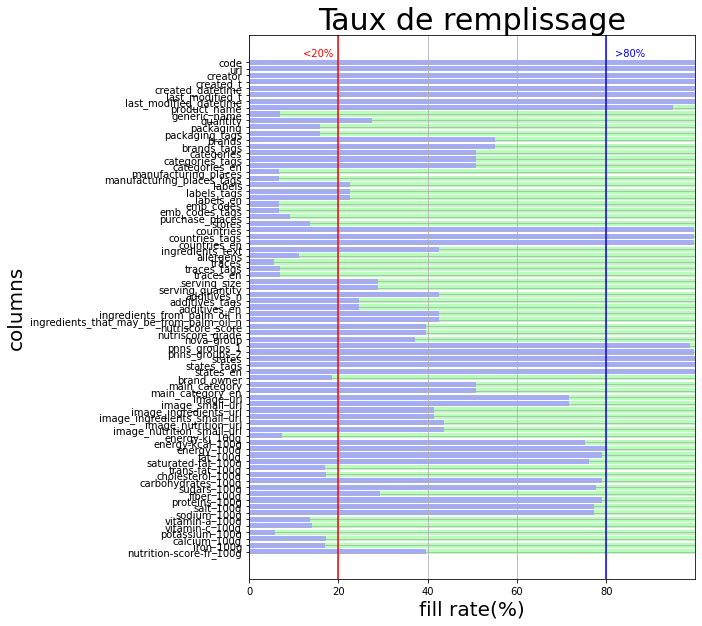

In [ ]:
TraceValeurMissing(dataNettoyage)

# Description de notre base

In [ ]:
dataNettoyage.select_dtypes('object').columns
#Nous avons 50 variables categorielles

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'generic_name', 'quantity', 'packaging',
       'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'traces', 'traces_tags', 'traces_en', 'serving_size', 'additives_tags',
       'additives_en', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'brand_owner', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],
      dtype='object')

In [ ]:
dataNettoyage.select_dtypes('int64').columns
#Nous avons 2 variables int64
#en réalité ce sont des dates la date ou le produit a ete ajouté created_t
#ecrit en timestamp
#la date ou le produit a ete modifié  date last_modified_t

Index(['created_t', 'last_modified_t'], dtype='object')

In [ ]:
dataNettoyage.select_dtypes('float64').columns
#25 variables numeriques

Index(['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'potassium_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

# FILTRE N°2( Suppression des variables de temps )

In [ ]:
#on va supprimer toutes les variables de temps 
#ils ne sont pas pertinents pour notre étude
i=dataNettoyage.select_dtypes('int64').columns.str.endswith('_t')== True
#on cherche toutes les colonnes avec une terminaison _t 
datecol=dataNettoyage.select_dtypes('int64').columns
#le nom de toutes les colonnes comme format int64
Date=datecol[i]
#l'ensemble des colonnes avec une terminaisoon _t
sum(i)

2

In [ ]:
Date# résultat de la sélection

Index(['created_t', 'last_modified_t'], dtype='object')

In [ ]:
dataNettoyage=dataNettoyage.drop(columns=Date)
#suppression de ces deux colonnes 

In [ ]:
dataNettoyage=dataNettoyage.drop(columns=['created_datetime','last_modified_datetime'])
#on pouvait faire la meme chose que la variable temps 
#en utilisant la terminaison datetime 

In [ ]:
dataNettoyage.shape #on passe de 77 colonnes à 73 colonnes

(1555491, 73)

# FILTRE N° 3(Suppression des colonnes avec url) 

In [ ]:
#de meme que la variable temps nous allons supprimer les variables
#avec terminaison Url qui représente des sites web
u=dataNettoyage.select_dtypes('object').columns.str.endswith('_url')== True
urlcol=dataNettoyage.select_dtypes('object').columns
Url=urlcol[u]
sum(u)

6

In [ ]:
Url #verification de notre sélection

Index(['image_url', 'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'image_nutrition_url',
       'image_nutrition_small_url'],
      dtype='object')

In [ ]:
dataNettoyage=dataNettoyage.drop(columns=Url)#suppression de cette sélection

In [ ]:
dataNettoyage=dataNettoyage.drop(columns=['url'])#il reste une variable url

In [ ]:
dataNettoyage.shape #on passe de 73 colonnes à 66 colonnes 

(1555491, 66)

In [ ]:
dataNettoyage.select_dtypes('float64').columns
#25 variables quantitatives

Index(['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'potassium_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

# FILTRE N°3 ( Recherche et suppression des doublons)

In [ ]:
dataNettoyage.shape
#1555491 et 66 colonnes 
#On peut identifier nos produits aux noms et au code 
#Nous décidons de travailler sur le code car un code d'un produit est unique 
#deux produits peuvent avoir le meme nom mais pas le meme code 

(1555491, 66)

## Fonction qui recherche et supprime les doublons

In [ ]:
#fonction qui permet de choisir une base la colonne qui nous dit le nombre
#de doublons et qui les supprimes
def Doublons(Base,colonne):
  d=Base.duplicated(subset=colonne).sum()
  print('Vous avez {} doublons pour cette variable {}'.format(d,colonne))
  lignes=Base.shape[0]-d
  NBase=Base.drop_duplicates(subset=colonne)
  print('Il vous restent {} lignes de votre Dataframe'.format(lignes))
  return NBase



In [ ]:
dataNettoyage1=Doublons(dataNettoyage,'code')
#on passe de 1555491 à 1555480

Vous avez 11 doublons pour cette variable code
Il vous restent 1555480 lignes de votre Dataframe


In [ ]:
dataNettoyage1.shape #taille de notre jeu 

(1555480, 66)

# FILTRE N°4 ( Recherche et suppression des lignes n'ayant pas de nom produit et de nutriscore grade)

In [ ]:
#dans le cas de notre étude nous nous intéresserons que sur les lignes 
#ayant le nom du produit renseigne ainsi que le nutriscore grade 
i=(dataNettoyage1['product_name'].isna()== True) & (dataNettoyage1['nutriscore_grade'].isna() == True)
#dataNettoyage1[i]
#ligne pour identifier les produits et verifier que c'est bon
#sum(i)
#Nous avons 77183 produits qui n'ont pas de nom et pas de nutri score 
dataNettoyage1=dataNettoyage1.drop(dataNettoyage1[i].index)
#on supprime toutes ces lignes 


In [ ]:
dataNettoyage1.shape
# taille on a 1478297 (95 % restantes) on avait 1555480 et 66 colonnes, 77183 produits supprimes
#on a perdu 5% de lignes 

(1478297, 66)

# FILTRE N°5( Suppression lignes pas de nom du produit)

In [ ]:
d=dataNettoyage1['product_name'].isna()== True
#sum(d)
#2366 lignes n'ont pas de nom de produits 
#dataNettoyage1[d].head(3)
dataNettoyage1=dataNettoyage1.drop(dataNettoyage1[d].index)

In [ ]:
dataNettoyage1.shape
#on passe de 1478297 a 1475931 
#soit 99% de lignes restantes on a perdu 2366

(1475931, 66)

## Graphiques valeurs manquantes

les colonnes vides sont:




[]

,code,creator,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
number of missing values,0,4,0,1368217,1064731,1230612,1230624,644564,644618,693599,693601,693601,1372864,1372908,1134026,1134004,1134004,1374470,1374496,1334086,1268228,3664,3668,3668,819890,1301697,1389783,1368026,1368026,1030024,1029266,819889,1094642,1094642,819889,819889,861255,861255,901185,14404,0,0,0,0,1186885,693601,693601,1362901,310051,244127,253270,297029,1212083,1208155,253942,274500,1023487,252206,278250,278255,1264224,1256670,1384520,1207262,1212072,861255
number of values,1475931,1475927,1475931,107714,411200,245319,245307,831367,831313,782332,782330,782330,103067,103023,341905,341927,341927,101461,101435,141845,207703,1472267,1472263,1472263,656041,174234,86148,107905,107905,445907,446665,656042,381289,381289,656042,656042,614676,614676,574746,1461527,1475931,1475931,1475931,1475931,289046,782330,782330,113030,1165880,1231804,1222661,1178902,263848,267776,1221989,1201431,452444,1223725,1197681,1197676,211707,219261,91411,268669,263859,614676
fill_rate,1,0.999997,1,0.0729804,0.278604,0.166213,0.166205,0.563283,0.563247,0.53006,0.530059,0.530059,0.0698319,0.069802,0.231654,0.231669,0.231669,0.0687437,0.0687261,0.0961054,0.140727,0.997517,0.997515,0.997515,0.444493,0.11805,0.0583686,0.0731098,0.0731098,0.302119,0.302633,0.444494,0.258338,0.258338,0.444494,0.444494,0.416467,0.416467,0.389413,0.990241,1,1,1,1,0.19584,0.530059,0.530059,0.0765822,0.789929,0.834595,0.8284,0.798751,0.178767,0.181429,0.827945,0.814016,0.306548,0.829121,0.811475,0.811472,0.14344,0.148558,0.0619345,0.182034,0.178775,0.416467


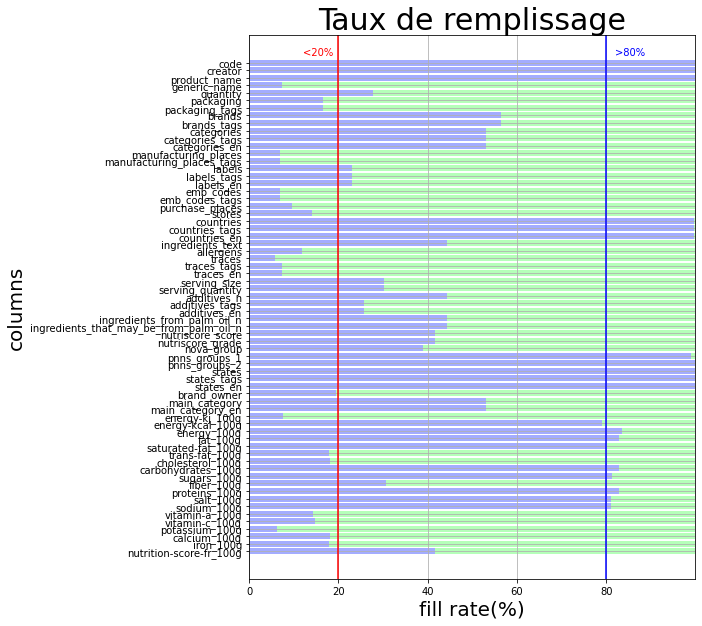

In [ ]:
TraceValeurMissing(dataNettoyage1)

# FILTRE N°6( Suppression de lignes qui n'ont pas assez de colonnes remplis)

In [ ]:
dataNettoyage1.shape #1475931,66 colonnes 

(1475931, 66)

In [ ]:
dataNettoyage1=dataNettoyage1.dropna(thresh=19,axis=0)
#on prend 30% de nos 66 colonnes c'est a dire 19 colonnes
#on supprime tous les individus qui n'ont pas au moins 19 colonnes remplis

In [ ]:
dataNettoyage1.shape
#on passe de 1475931 à 1276860 soit 199071 produits supprimés
#66 colonnes 
#soit 13 % de lignes perdus 

(1276860, 66)

In [ ]:
Missing(dataNettoyage1.select_dtypes('float'))
#25 colonnes quantitatives 

serving_quantity                           65.220698
additives_n                                49.416302
ingredients_from_palm_oil_n                49.416302
ingredients_that_may_be_from_palm_oil_n    49.416302
nutriscore_score                           51.860423
nova_group                                 55.363705
energy-kj_100g                             91.156587
energy-kcal_100g                           10.366524
energy_100g                                 5.212944
fat_100g                                    5.576257
saturated-fat_100g                          9.202262
trans-fat_100g                             79.336184
cholesterol_100g                           79.028633
carbohydrates_100g                          5.627633
sugars_100g                                 7.245195
fiber_100g                                 64.570979
proteins_100g                               5.493006
salt_100g                                   7.207446
sodium_100g                                 7.

# FILTRE N°7 (Nettoyage de la variable country tags)

In [ ]:
dataNettoyage1['countries_tags'].unique().shape
#countries tags variable qui représente tous les pays ou se vend ce produit
#3119 pays   
#dans notre base nous avons pour countriestags 3119 pays
#nous remarquons que la liste des pays est de la forme en:France,pays par exemple
#essayons de prendre le premier pays en utilisant une fonction 

(3119,)

In [ ]:
dataNettoyage1['countries_tags']=dataNettoyage1['countries_tags'].astype('str')
#conversion de notre colonne en chaine de caractere 
#car presence d'un chiffre 2.0 dans la colonne

## Fonctions qui prend le deuxieme élement de country tags 

In [ ]:
#fonction qui nous retourne le premier element d'une chaine de carcatere 
#separe par ,
def Changement (string):
    parts = string.split(',')
    # split en utilisant , comme separateur compte le nombre delements
    #de la chaine de caractere 
    
    return parts[0]
   
    

In [ ]:
dataNettoyage1['countries_tags']=dataNettoyage1['countries_tags'].apply(Changement)

In [ ]:
dataNettoyage1['countries_tags'].unique().shape
#256 pays en unique 
#on va regarder les pays les plus représentés en vue de choisir un pays 
#on va travailler sur la colonne country tags on va supprimer les autres country

(256,)

# FILTRE N°8 (Suppression des colonnes qui representent des pays) 

In [ ]:
dataNettoyage1.shape #1276860 et 66 colonnes

(1276860, 66)

In [ ]:
#suppression des autres variables countries 
dataNettoyage1=dataNettoyage1.drop(columns=['countries','countries_en'])

In [ ]:
dataNettoyage1.shape
#64 colonnes et 1276860

(1276860, 64)

# FILTRE N°9 (Choix de mon pays)

In [ ]:
pays=dataNettoyage1['countries_tags'].value_counts(dropna=False) 
#value_counts pour compter
#nous avons 256 pays en unique
#nous voyons qu'on a la france les usa qui ont beaucoup plus de produits
#renseignes on va travailler sur le pays france qui a au moins 592988 produits 
modalites=pays.index #modalites
tab=pd.DataFrame(modalites,columns=['countries_tags'])
tab['effectif']=pays.values #effectif
tab['frequence']=tab['effectif']/dataNettoyage1.shape[0]
#tab=tab.sort_values('countries_tags')
#tri selon les modalites
tab['Frequence cumulée']=(tab['frequence'].cumsum())*100




In [ ]:
tab

,countries_tags,effectif,frequence,Frequence cumulée
0,en:france,592988,4.644111e-01,46.441113
1,en:united-states,321677,2.519282e-01,71.633930
2,en:spain,137803,1.079233e-01,82.426264
3,en:belgium,44467,3.482527e-02,85.908792
4,en:germany,37133,2.908150e-02,88.816942
...,...,...,...,...
251,en:maroc,1,7.831712e-07,99.999687
252,pl:polska-poland,1,7.831712e-07,99.999765
253,en:frankrijk,1,7.831712e-07,99.999843
254,en:tunisie,1,7.831712e-07,99.999922


<Figure size 1440x720 with 0 Axes>

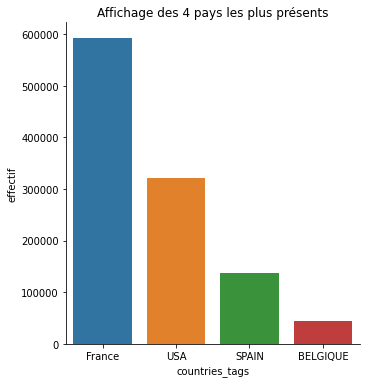

In [ ]:
#affichage des 5 premieres lignes
d=tab.loc[0:3,['countries_tags','effectif','Frequence cumulée']]
plt.figure(figsize=(20,10));
g=sns.catplot(x='countries_tags',y='effectif',kind='bar',data=d);
(g.set_xticklabels(['France','USA','SPAIN','BELGIQUE']))
plt.title('Affichage des 4 pays les plus présents');


In [ ]:
dataNettoyage1.shape

(1276860, 64)

In [ ]:
# choix de mon pays 
#la france est mieux representé on va prendre ce pays pour continuer a 
#faire notre analyse
i=dataNettoyage1['countries_tags']=='en:france'
dataFrance=dataNettoyage1[i]
dataFrance=dataFrance.reset_index(drop=True)#reindexation de notre data frame

In [ ]:
dataFrance.shape
#nous avons 592988 lignes  et 64 colonnes 
#on passe de 1276860 à 592988 soit 683872 des autres produits 
#sont des produits d'autres pays 
#en terme de % on a 46% de notre base  contient les produits de la france 
#nous allons travailler sur contries tags 

(592988, 64)

In [ ]:
dataFrance.select_dtypes('float').columns #25 variables 

Index(['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'potassium_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [ ]:
p=Missing(dataFrance).sort_values()
df=pd.DataFrame(p.index,columns=['variables'])
df['pourcentage']=p.values
df

,variables,pourcentage
0,code,0.000000
1,product_name,0.000000
2,pnns_groups_2,0.000000
3,states,0.000000
4,countries_tags,0.000000
5,states_tags,0.000000
6,states_en,0.000000
7,creator,0.000169
8,pnns_groups_1,1.157190
9,energy_100g,5.804333


# FILTRE N° 10 (Suppression des colonnes vides pour la France )

In [ ]:
dataFrance=Suppression(dataFrance,95)
#on garde toutes les colonnes ayant moins de 95 % de valeur manquante

In [ ]:
dataFrance.shape
#on passe de 64 colonnes à 56 colonnes

(592988, 56)

In [ ]:
dataFrance=dataFrance.reset_index(drop=True)#reindexation de notre data frame

In [ ]:
dataFrance.dtypes.value_counts()
#nombre de type de variables 
#on compte le nombre de types de variables

object     38
float64    18
dtype: int64

In [ ]:
dataFrance.select_dtypes('float').columns
#18 variables quantitatives on va travailler sur ces variables

Index(['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

les colonnes vides sont:




[]

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
number of missing values,523984,369665,369665,369665,341336,406774,529681,71816,34419,37508,37055,37711,36895,464786,35567,46452,46453,341336
number of values,69004,223323,223323,223323,251652,186214,63307,521172,558569,555480,555933,555277,556093,128202,557421,546536,546535,251652
fill_rate,0.116367,0.376606,0.376606,0.376606,0.42438,0.314027,0.106759,0.878891,0.941957,0.936747,0.937511,0.936405,0.937781,0.216197,0.940021,0.921665,0.921663,0.42438


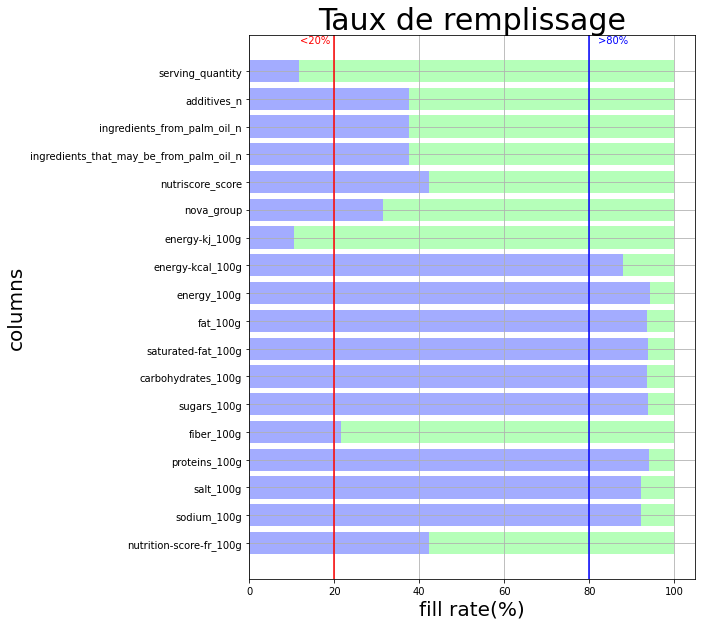

In [ ]:
TraceValeurMissing(dataFrance.select_dtypes('float'))
#taux de remplissage des colonnes quantitatives

In [ ]:
Missing(dataFrance.select_dtypes('float'))# pourcentage valeur manquante
#variables quantitatives

serving_quantity                           88.363340
additives_n                                62.339373
ingredients_from_palm_oil_n                62.339373
ingredients_that_may_be_from_palm_oil_n    62.339373
nutriscore_score                           57.562042
nova_group                                 68.597341
energy-kj_100g                             89.324067
energy-kcal_100g                           12.110869
energy_100g                                 5.804333
fat_100g                                    6.325254
saturated-fat_100g                          6.248862
carbohydrates_100g                          6.359488
sugars_100g                                 6.221880
fiber_100g                                 78.380338
proteins_100g                               5.997929
salt_100g                                   7.833548
sodium_100g                                 7.833717
nutrition-score-fr_100g                    57.562042
dtype: float64

les colonnes vides sont:




[]

,code,creator,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,additives_tags,additives_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en
number of missing values,0,1,0,524440,373591,444895,444900,229159,229188,287832,287832,287832,530475,530506,383994,383968,383968,517904,517920,505912,469428,0,369666,513502,538533,522554,522554,524085,475514,475514,341336,6862,0,0,0,0,287832,287832
number of values,592988,592987,592988,68548,219397,148093,148088,363829,363800,305156,305156,305156,62513,62482,208994,209020,209020,75084,75068,87076,123560,592988,223322,79486,54455,70434,70434,68903,117474,117474,251652,586126,592988,592988,592988,592988,305156,305156
fill_rate,1,0.999998,1,0.115598,0.369986,0.24974,0.249732,0.613552,0.613503,0.514607,0.514607,0.514607,0.10542,0.105368,0.352442,0.352486,0.352486,0.12662,0.126593,0.146843,0.208368,1,0.376605,0.134043,0.0918315,0.118778,0.118778,0.116196,0.198105,0.198105,0.42438,0.988428,1,1,1,1,0.514607,0.514607


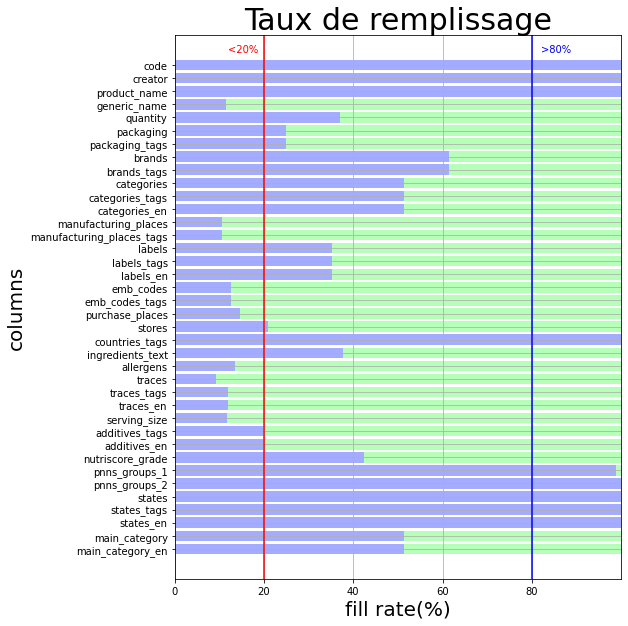

In [ ]:
TraceValeurMissing(dataFrance.select_dtypes('object'))
#taux de remplissage variables qualitatives
#taux de valeurs manquantes 


In [ ]:
dataFrance.describe(include='O')#pour avoir la var categorielles
#on remarque que le top produit est le comte 
#le top magasin est auchan

,code,creator,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,additives_tags,additives_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en
count,592988,592987,592988,68548,219397,148093,148088,363829,363800,305156,305156,305156,62513,62482,208994,209020,209020,75084,75068,87076,123560,592988,223322,79486,54455,70434,70434,68903,117474,117474,251652,586126,592988,592988,592988,592988,305156,305156
unique,592988,5293,413290,49881,20418,28007,22459,65411,49075,48343,37934,37934,13214,11975,45951,33742,33688,18394,16447,6747,6967,1,207315,3367,5290,5620,5620,9031,30662,30662,5,14,46,1644,1644,1644,15603,15603
top,3257984555454,kiliweb,Comté,Pâtes alimentaires au blé dur de qualité supér...,500 g,"sachet,plastique","sachet,plastique",Auchan,auchan,Boissons,en:beverages,Beverages,France,france,en:organic,en:organic,Organic,FR 72.264.002 EC,fr-72-264-002-ec,France,Magasins U,en:france,Miel,en:milk,en:nuts,en:nuts,Nuts,100g,"en:e322,en:e322i","E322 - Lecithins,E322i - Lecithin",d,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:sweetened-beverages,Sweetened beverages
freq,1,466584,779,163,10021,4236,8660,8662,8873,3772,3982,3982,21400,22268,8272,16666,16666,402,406,38806,12626,592988,245,15866,5292,7284,7284,6023,6407,6407,78082,322849,322849,115472,115472,115472,4561,4561


In [ ]:
dataFrance.describe()#statistiques univariées

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,69004.000000,223323.000000,223323.000000,223323.000000,251652.000000,186214.000000,63307.000000,521172.000000,558569.000000,555480.000000,5.559330e+05,555277.000000,556093.000000,128202.000000,557421.000000,546536.000000,546535.000000,251652.000000
mean,135.408575,1.590983,0.047841,0.114722,9.492752,3.412278,1089.670573,280.146833,1164.142945,14.186107,2.446338e+08,27.124603,13.762869,2.992542,8.953426,1.275603,0.510357,9.492752
std,3795.068477,2.354822,0.216327,0.403196,8.774565,0.966047,838.642801,197.398292,819.226869,17.360348,1.824012e+11,27.777404,20.071768,5.087563,9.999943,6.015840,2.407372,8.774565
min,0.000000,0.000000,0.000000,0.000000,-15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,30.000000,0.000000,0.000000,0.000000,2.000000,3.000000,439.000000,116.000000,477.000000,1.010000,2.000000e-01,2.600000,0.600000,0.100000,1.600000,0.070000,0.028000,2.000000
50%,85.000000,1.000000,0.000000,0.000000,10.000000,4.000000,978.000000,270.000000,1113.000000,8.000000,2.090000e+00,14.000000,3.500000,1.600000,6.200000,0.540000,0.216000,10.000000
75%,150.000000,2.000000,0.000000,0.000000,16.000000,4.000000,1611.000000,402.000000,1678.000000,22.200000,8.000000e+00,52.000000,20.000000,3.600000,13.000000,1.300000,0.520000,16.000000
max,977997.000000,30.000000,3.000000,6.000000,40.000000,4.000000,86200.000000,20600.000000,86200.000000,100.000000,1.360000e+14,704.500000,552.000000,100.000000,128.000000,2250.000000,900.000000,40.000000


# FILTRE N° 11(Suppression des quantités non comprise entre 0 et 100g)

In [ ]:
dataFrance.describe()
#les nutriments ont ete mesurés pour 100g de produit donc
#ils ne doivent pas etre supérieur
#nous remarquons que certaines variables qui doit etre comprise entre 0 et 100 ne le sont pas 
#on va les supprimer pour avoir des données entre 0 et 100 g 

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,69004.000000,223323.000000,223323.000000,223323.000000,251652.000000,186214.000000,63307.000000,521172.000000,558569.000000,555480.000000,5.559330e+05,555277.000000,556093.000000,128202.000000,557421.000000,546536.000000,546535.000000,251652.000000
mean,135.408575,1.590983,0.047841,0.114722,9.492752,3.412278,1089.670573,280.146833,1164.142945,14.186107,2.446338e+08,27.124603,13.762869,2.992542,8.953426,1.275603,0.510357,9.492752
std,3795.068477,2.354822,0.216327,0.403196,8.774565,0.966047,838.642801,197.398292,819.226869,17.360348,1.824012e+11,27.777404,20.071768,5.087563,9.999943,6.015840,2.407372,8.774565
min,0.000000,0.000000,0.000000,0.000000,-15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,30.000000,0.000000,0.000000,0.000000,2.000000,3.000000,439.000000,116.000000,477.000000,1.010000,2.000000e-01,2.600000,0.600000,0.100000,1.600000,0.070000,0.028000,2.000000
50%,85.000000,1.000000,0.000000,0.000000,10.000000,4.000000,978.000000,270.000000,1113.000000,8.000000,2.090000e+00,14.000000,3.500000,1.600000,6.200000,0.540000,0.216000,10.000000
75%,150.000000,2.000000,0.000000,0.000000,16.000000,4.000000,1611.000000,402.000000,1678.000000,22.200000,8.000000e+00,52.000000,20.000000,3.600000,13.000000,1.300000,0.520000,16.000000
max,977997.000000,30.000000,3.000000,6.000000,40.000000,4.000000,86200.000000,20600.000000,86200.000000,100.000000,1.360000e+14,704.500000,552.000000,100.000000,128.000000,2250.000000,900.000000,40.000000


In [ ]:
dataFrance.select_dtypes('float').columns

Index(['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [ ]:
#on renomme nos variables 
#en vue de la sélection des variablesen rapport avec les nutriments 
dataFrance=dataFrance.rename(columns={'energy-kcal_100g':'Energiekcal','energy-kj_100g':'Energiekj','nutrition-score-fr_100g':'nutrition-score100g','energy_100g':'energy100g'})

In [ ]:
j=dataFrance.select_dtypes('float64').columns.str.endswith('_100g')== True
sum(j)
#8 variables se terminent par _100g on va travailler sur ces variables sauf pour 
#celui du nutriscore pour 100g qui peut etre egal à -15 ou 40 et l'energie kcal_100g
#et energy 100g

8

In [ ]:
numericcol=dataFrance.select_dtypes('float64').columns
#toutes les variables quantitatives

In [ ]:
dataFrance[numericcol[j]].columns#toutes les variables avec terminaison _100g

Index(['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [ ]:
dataFrance.shape
#le nombre de valeurs qui n'est pas comprise entre 0 et 100g 
#dataFrance.shape # 592988lignes et 56 colonnes 

(592988, 56)

## Suppression de ces individus dont les valeurs pas comprise entre 0 et 100

In [ ]:
#regardons si les variables qui doit etre comprise entre 0 et 100
#methode garniture trimming
V=numericcol[j]#toutes les colonnes avec _100g
for col in V: 
  #contient tous les produits dont les valeurs _100g sont superieurs a 100
#et negatif on prend les index et on les supprime
  recherche = dataFrance[(dataFrance[col] > 100)|(dataFrance[col] < 0)].index
  dataFrance=dataFrance.drop(recherche)

In [ ]:
dataFrance.shape # on passe de 592988 à 592954 soit 34 lignes en moins

(592954, 56)

In [ ]:
dataFrance.describe()
#verification que mes variables sont compris entre 0 et 100g

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,Energiekj,Energiekcal,energy100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score100g
count,68986.000000,223300.000000,223300.000000,223300.000000,251632.000000,186195.000000,63302.000000,521140.000000,558536.000000,555447.000000,555902.000000,555244.000000,556062.000000,128191.000000,557388.000000,546502.000000,546501.000000,251632.000000
mean,135.437789,1.590981,0.047841,0.114734,9.492318,3.412283,1089.514122,280.140470,1164.099293,14.186110,5.457233,27.117849,13.761480,2.991786,8.953118,1.261386,0.504670,9.492318
std,3795.563111,2.354816,0.216328,0.403215,8.774103,0.966050,837.652658,197.382235,819.049478,17.360333,7.950115,27.726973,20.058273,5.084517,9.997755,4.414587,1.767245,8.774103
min,0.000000,0.000000,0.000000,0.000000,-15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,30.000000,0.000000,0.000000,0.000000,2.000000,3.000000,439.000000,116.000000,477.000000,1.010000,0.200000,2.600000,0.600000,0.100000,1.600000,0.070000,0.028000,2.000000
50%,85.000000,1.000000,0.000000,0.000000,10.000000,4.000000,978.000000,270.000000,1113.000000,8.000000,2.090000,14.000000,3.500000,1.600000,6.200000,0.540000,0.216000,10.000000
75%,150.000000,2.000000,0.000000,0.000000,16.000000,4.000000,1611.000000,402.000000,1678.000000,22.200000,8.000000,52.000000,20.000000,3.600000,13.000000,1.300000,0.520000,16.000000
max,977997.000000,30.000000,3.000000,6.000000,40.000000,4.000000,86200.000000,20600.000000,86200.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,49.987200,40.000000


# FILTRE N° 12 (Corrélation de certaines variables)

In [ ]:
dataFrance.select_dtypes('float').columns.shape
#18 variables quantitatives

(18,)

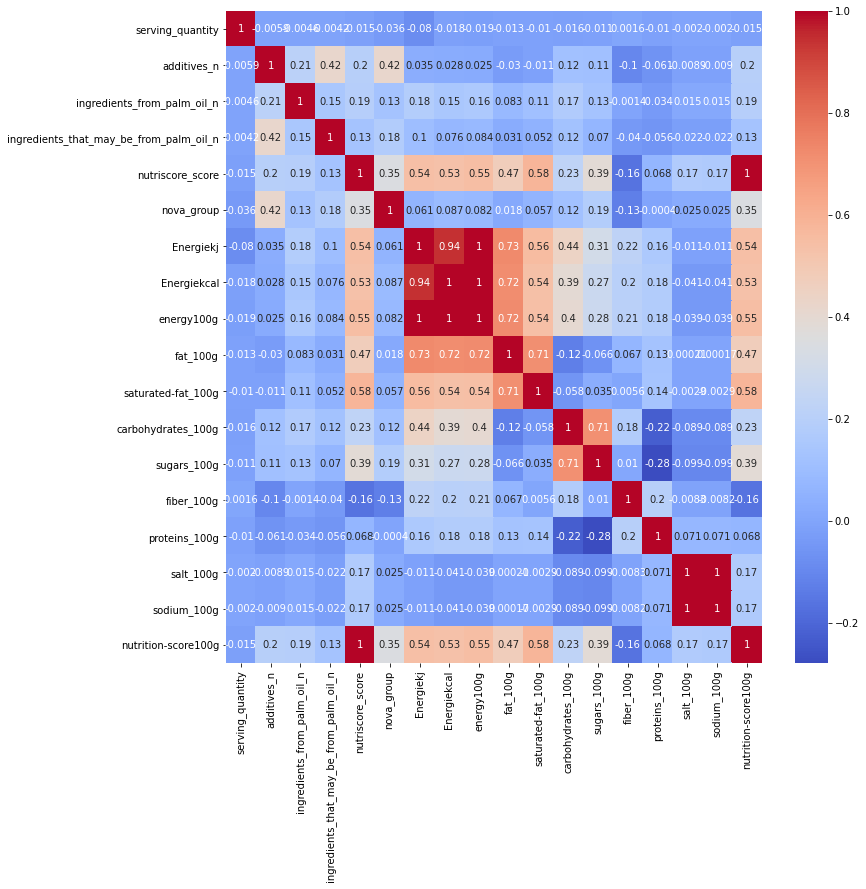

In [ ]:
cor=dataFrance.corr()
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')
#si le coefficient de correlation est superieur a 0.85
#si deux variables sont corrélées entre eux ca veut dire quils donnent
#la meme information

## Suppression des variables corrolées

In [ ]:
dataFrance=dataFrance.drop(columns=['Energiekj','serving_quantity','energy100g','nutriscore_score'])
#ces variables sont correles au variables energie, nutriscore, sodium
#la variable serving quantity nous donne aucune info
#on va garder salt_100g pour faire literative imputer et trouver les valeurs de sodium

In [ ]:
dataFrance.shape #592954 et 52 variables dont 14 quantitatives 

(592954, 52)

# FILTRE N°13 (Filtration somme  des variables_100g pas >100g et =0)

In [ ]:
dataFrance['Somme_100g']=(dataFrance['sodium_100g']+dataFrance['fat_100g']+dataFrance['saturated-fat_100g']+dataFrance['carbohydrates_100g']
 +dataFrance['sugars_100g']+dataFrance['fiber_100g']+dataFrance['proteins_100g'])
#calcul de la somme de tous les nutriments 
#la somme de ces nutriments ne doit pas dépasser 100g car les produits ont ete pris
#pour 100g de produits 
#en vue de regarder si la somme de ces nutriments est superieur à 100g
#et inférieur à 0

## Suppression de ces individus

In [ ]:
h=(dataFrance['Somme_100g'] > 100 ) | (dataFrance['Somme_100g'] <= 0 )
sum(h) 
#38883 valeurs > 100
#1431  valeurs =0
dataFrance[h].index
dataFrance=dataFrance.drop(dataFrance[h].index)

In [ ]:
dataFrance.shape
#on passe de 592954 a 552640 soit 40314 lignes supprimés
#soit 93% de notre base qui reste on a perdu 7% de lignes 

(552640, 53)

# FILTRE N°14 (Filtration  sur l'énergie Kcal)

In [ ]:
dataFrance.select_dtypes('float').columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nova_group', 'Energiekcal',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score100g', 'Somme_100g'],
      dtype='object')

In [ ]:
#le calcul de l'energiekcal se calcule de cette facon
# qui est la combinaison linéaire des vvaleurs des nutriments 
# E kcal = (9 x lipides) + (7 x alcool) + (4 x protéines) + (4 x glucides sauf polyols) + 
#(2.4 x acides organiques) + (2.4 x polyols) + (2 x fibres) 
dataFrance.shape


(552640, 53)

In [ ]:
#carbohydrates = glucides, fat = lipides, saturated_fat= acides organiques presence de carbone, 
#calcul de l'energie avec les nutriments presents à notre disposition
dataFrance['energiecalcule']=(4*dataFrance.proteins_100g)+(2*dataFrance.fiber_100g)+(2.4*dataFrance['saturated-fat_100g'])+(4*dataFrance['carbohydrates_100g'])+(9*dataFrance['fat_100g'])


## Comparaison energie kcal renseigne et calculé

<Figure size 1800x1800 with 0 Axes>

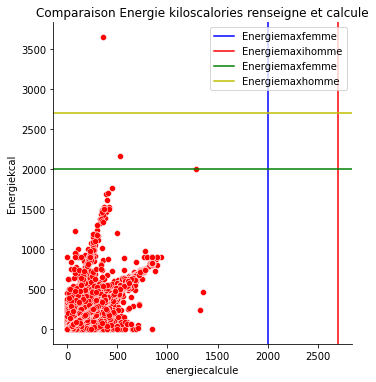

In [ ]:
dataFrance['Energiekcal'].isna().sum()
#65862 nan
dataFrance['energiecalcule'].isna().sum()
#467565 nan
#graphique de l'energie calculé et l'energie renseigné
#en vue d'identifier des outliers
plt.figure(figsize=(25,25))
sns.relplot(x='energiecalcule',y='Energiekcal',color='red',data=dataFrance);
plt.axvline(x=2000, color='b',label='Energiemaxfemme')
plt.axvline(x=2700, color='r',label='Energiemaxihomme')
#ligne verticale
plt.axhline(y=2000, color='g',label='Energiemaxfemme')
plt.axhline(y=2700, color='y',label='Energiemaxhomme')
#ligne horizontale
plt.title('Comparaison Energie kiloscalories renseigne et calcule');
plt.legend(loc='upper right')
plt.show()

## Identification des produits dont l'energie > aux besoins journaliers et nulle

In [ ]:
#les besoins en kcal d'une femme est comprise entre 1800 et 2000
#les besoins en kcal d'un homme est comprise entre 2100 à 2700
#nous allons identifier tous les produits qui ont une energie superieur a 2000
#et les produits avec une energie =0

In [ ]:
dataFrance.energiecalcule.max()

1355.0

In [ ]:
#en prenant la moyenne des 4 besoins caloriques d'un homme et une femme
#on se retrouve à une moyenne égale à 2150 on se fixe une limite égal à 2000
j=(dataFrance['Energiekcal'] >= 2000) | (dataFrance['Energiekcal'] <=0) 
pd.set_option('display.max_row',465)
dataFrance[['product_name','Energiekcal','energiecalcule']][j]
#25 produits ont une energie > a 2000
#10348 ont une energie egal à 0 si un aliment avait 
sum(j)


10373

## Suppression de ces individus 

In [ ]:
dataFrance.shape

(552640, 54)

In [ ]:
dataFrance=dataFrance.drop(dataFrance[j].index) #suppression de cette selection

In [ ]:
dataFrance.shape # nous avons perdus 10374 produits 

(542267, 54)

In [ ]:
dataFrance.describe() #statistiques univariées

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,Energiekcal,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score100g,Somme_100g,energiecalcule
count,186232.000000,186232.000000,186232.000000,155345.000000,4.764050e+05,505440.000000,505870.000000,505246.000000,506086.000000,87229.000000,507358.000000,497802.00000,497801.000000,221051.000000,84024.000000,84476.000000
mean,1.560108,0.036030,0.109455,3.385484,2.744465e+02,13.813652,5.331106,25.396825,12.581238,2.374363,9.183496,1.24937,0.499873,9.029563,46.388626,193.586836
std,2.353560,0.188486,0.396886,0.979161,1.895566e+02,16.930311,7.718029,26.946746,19.198646,4.603830,10.112600,3.78120,1.514287,8.728809,28.687390,140.493566
min,0.000000,0.000000,0.000000,1.000000,1.000000e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-15.000000,0.000001,0.000000
25%,0.000000,0.000000,0.000000,3.000000,1.160000e+02,1.200000,0.300000,2.500000,0.600000,0.000000,1.700000,0.09000,0.036000,2.000000,23.496000,71.100000
50%,1.000000,0.000000,0.000000,4.000000,2.580000e+02,7.800000,2.000000,12.500000,3.100000,1.200000,6.400000,0.60000,0.240000,9.000000,38.200000,162.280000
75%,2.000000,0.000000,0.000000,4.000000,3.920000e+02,22.000000,7.800000,49.000000,15.200000,2.800000,13.200000,1.40000,0.560000,16.000000,70.420000,300.920000
max,30.000000,3.000000,6.000000,4.000000,1.983000e+03,100.000000,100.000000,100.000000,100.000000,91.380000,100.000000,100.00000,49.987200,40.000000,100.000000,1355.000000


In [ ]:
#en regardant les statistique nous avons l'energie kcal en minimun
#qui est égal à 1.000000e-09 apres verification ceci est une erreur suppression de ce 
#produit
g=dataFrance.Energiekcal==1.000000e-09
#on verifie sur open food fact si ce produit avec une énergie égale 1.0000 e-9 existe ?
#ce produit n'éxiste pas ceci est une erreur
dataFrance[g]
dataFrance=dataFrance.drop(dataFrance[g].index)

In [ ]:
dataFrance.Energiekcal.describe() #statistique de l'energie kcal

count    476404.000000
mean        274.447066
std         189.556334
min           0.004187
25%         116.000000
50%         258.000000
75%         392.000000
max        1983.000000
Name: Energiekcal, dtype: float64

In [ ]:
b=dataFrance.Energiekcal==0.004187 
#ce produit avec ce taux d'energie kcal existe bien 
dataFrance[b]# ce produit existe aprés verification 

,code,creator,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,Energiekcal,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score100g,Somme_100g,energiecalcule
495833,6938888880800,kiliweb,MATCHA MIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,bubble tea (matcha flavor )/ thé aux bulles (s...,NaN,NaN,NaN,NaN,NaN,5.0,"en:e1442,en:e266,en:e270,en:e296,en:e460","E1442 - Hydroxypropyl distarch phosphate,E266 ...",0.0,0.0,NaN,4.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,0.004187,14.5,6.1,70.0,35.8,NaN,2.0,0.206,0.0824,NaN,NaN,NaN


In [ ]:
dataFrance.shape

(542266, 54)

#  FILTRE N° 15 (Identification valeur aberrante par les graphes et l'ecart interquartile)

## Tracé d'histogramme et boxplot avant suppression valeur aberrante

In [ ]:
numeric=dataFrance.select_dtypes('float').columns
#variable numerique
qualitative=dataFrance.select_dtypes('object').columns
#variable qualitative

In [ ]:
cat_data=dataFrance[qualitative]#dataframe categorielle
num_data=dataFrance[numeric] #dataframe numeric
cat_data=cat_data.reset_index(drop=True)#reindexation de notre data frame
num_data=num_data.reset_index(drop=True)

In [ ]:
def TraceGraphique(Base,colonne):
  plt.figure(figsize=(20,10))
  sns.boxplot(data=Base,x=colonne);
  plt.title('Dispersion de la variable {}'.format(colonne));
  sns.displot(data=Base,x=colonne,bins=20,kde=True);
  plt.title('Dispersion de la variable {}'.format(colonne));


In [ ]:
dataFrance.select_dtypes('float').columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nova_group', 'Energiekcal',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score100g', 'Somme_100g', 'energiecalcule'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this wa

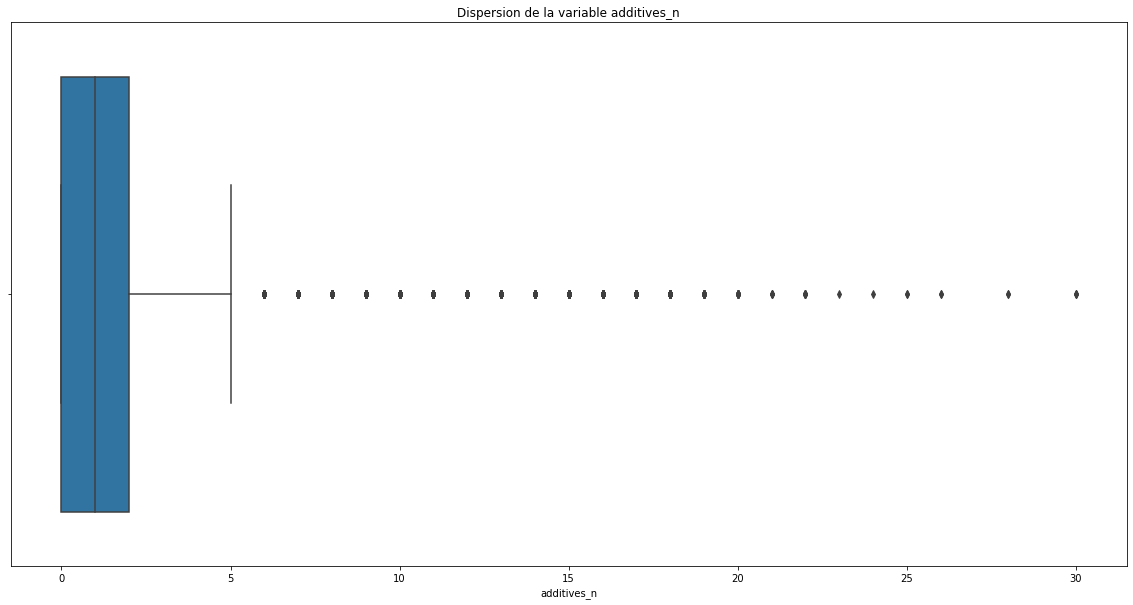

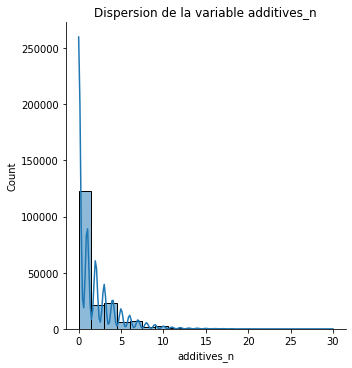

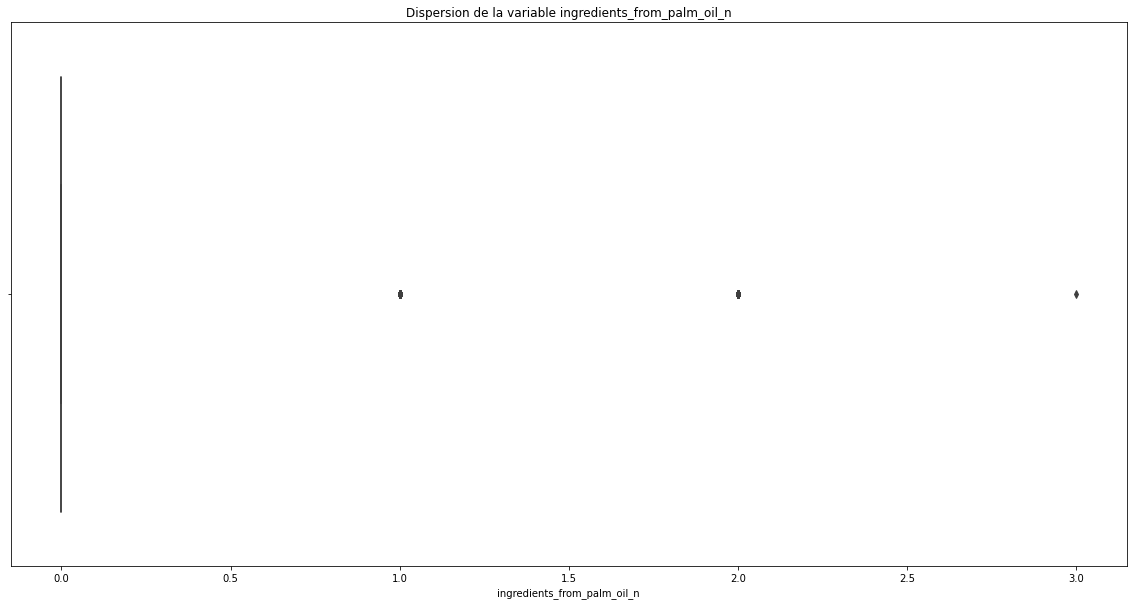

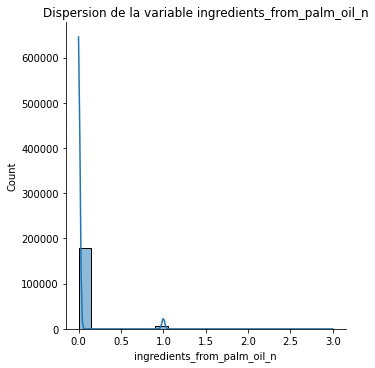

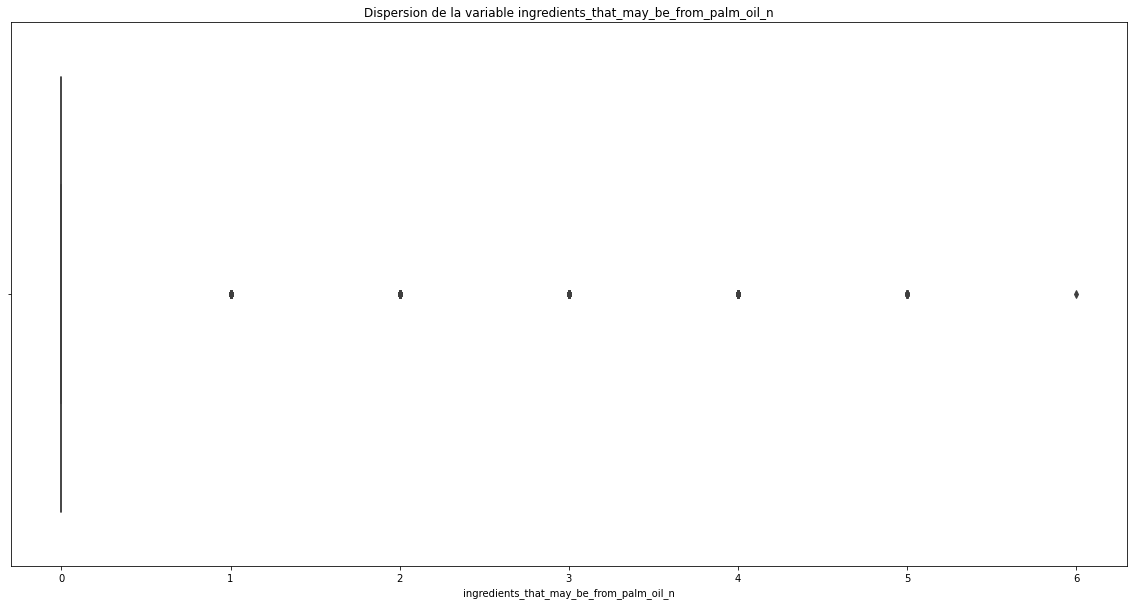

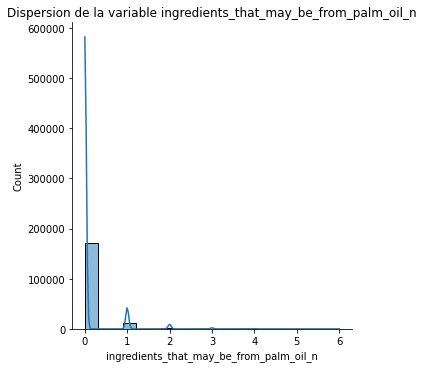

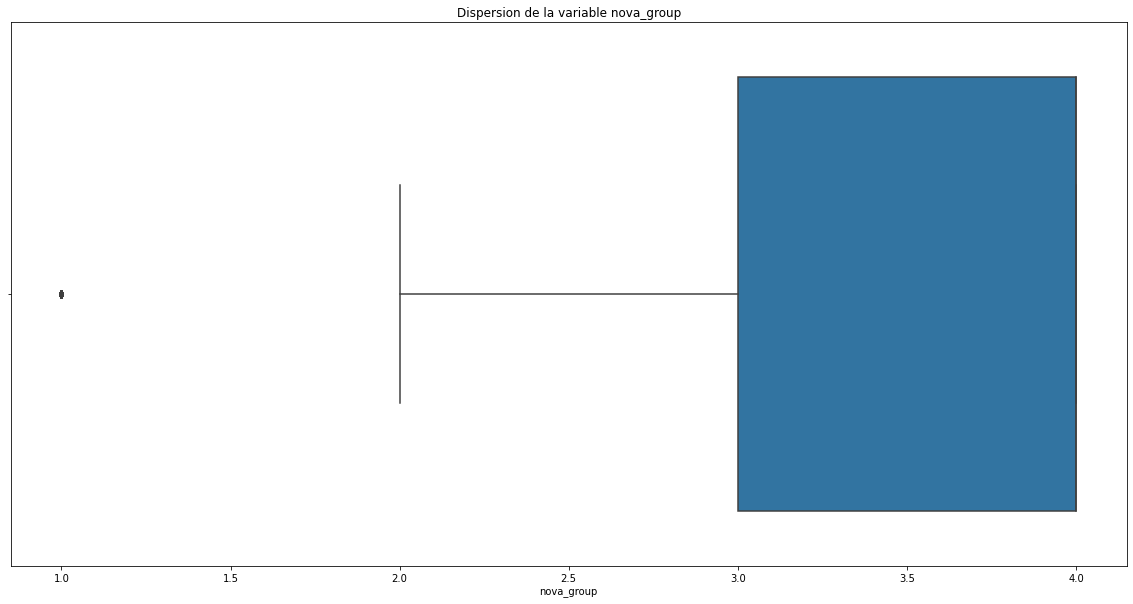

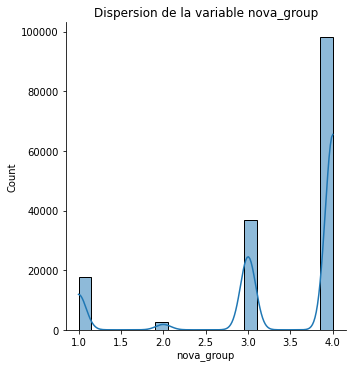

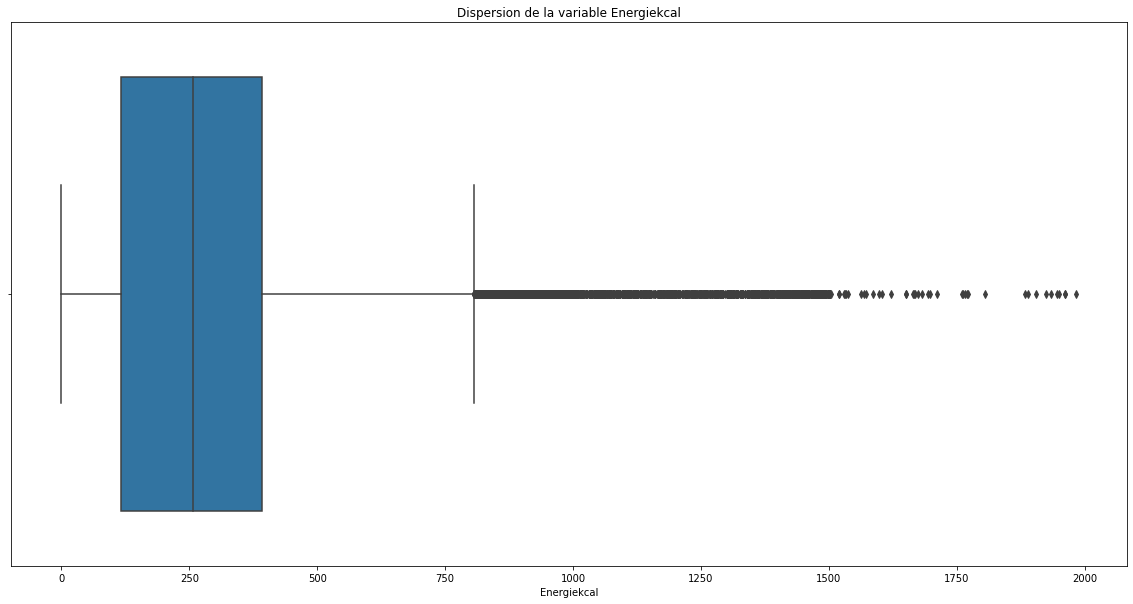

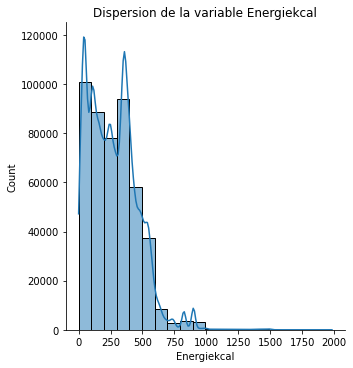

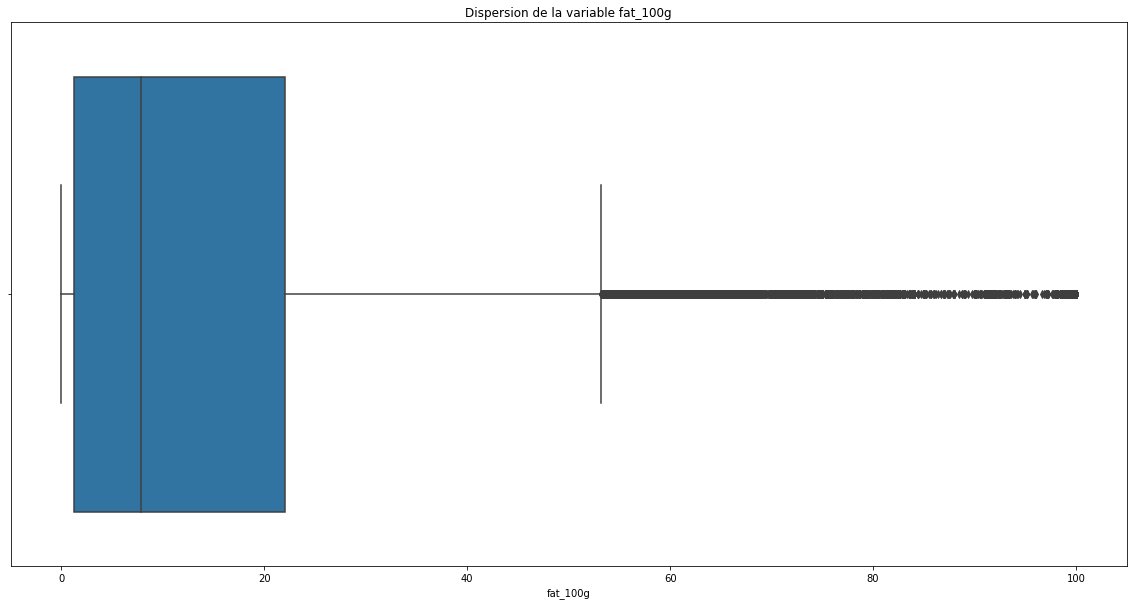

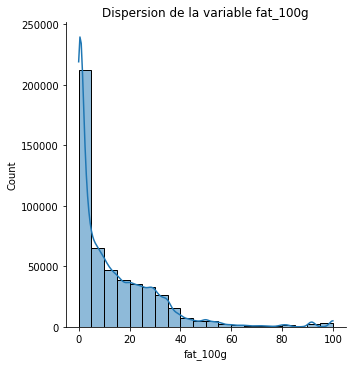

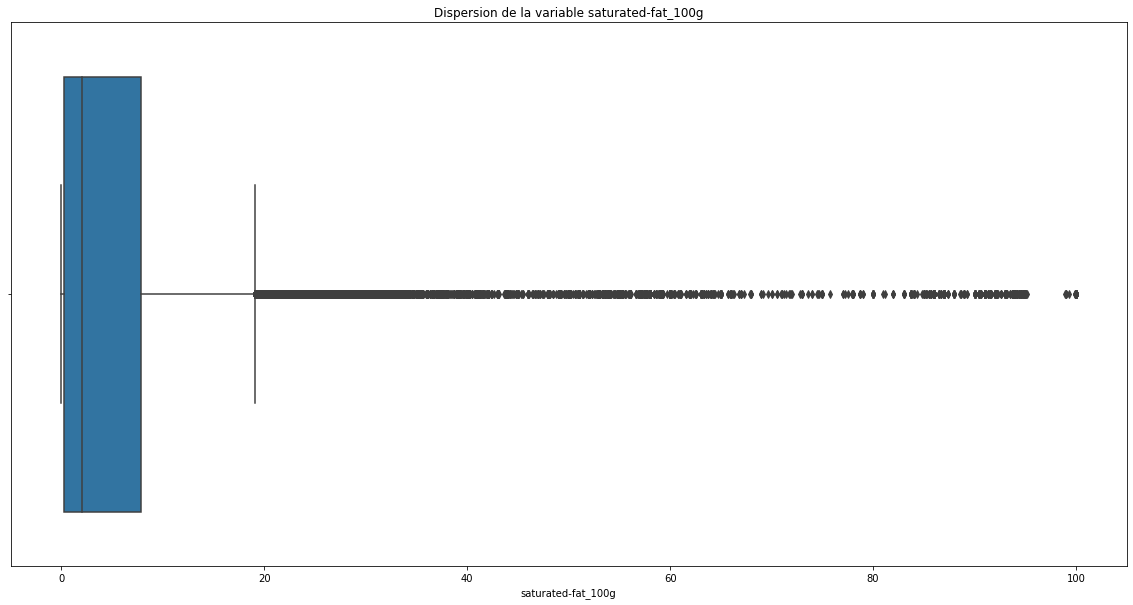

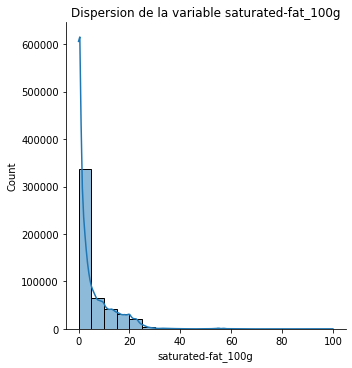

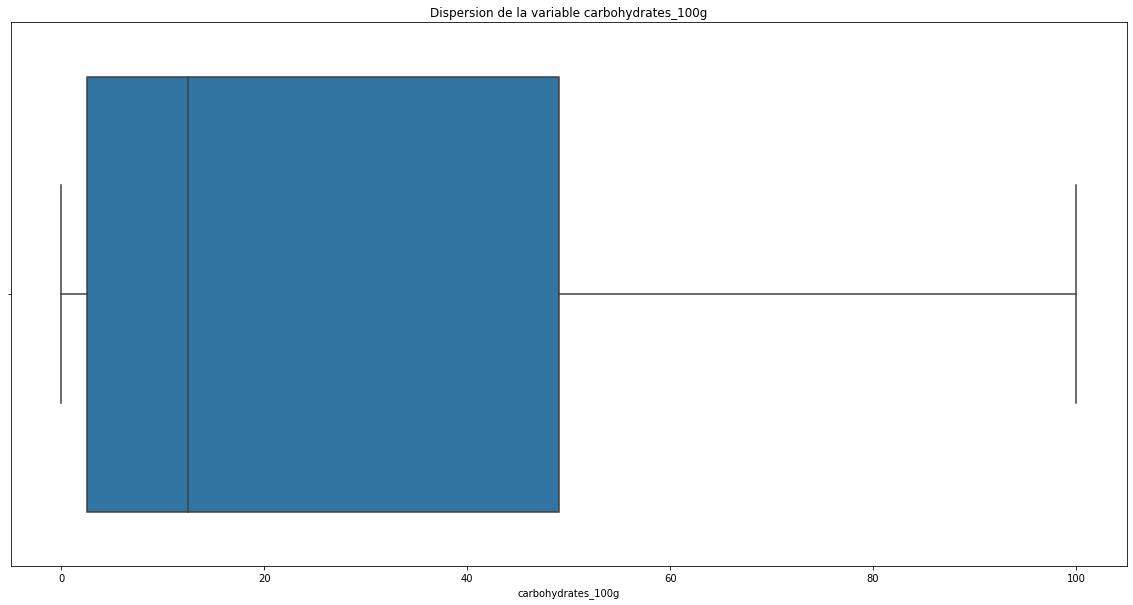

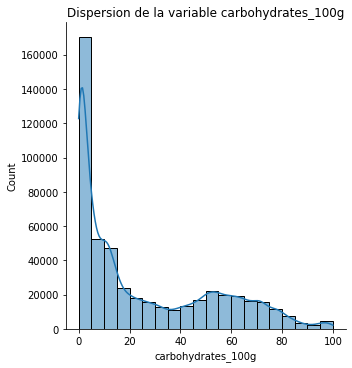

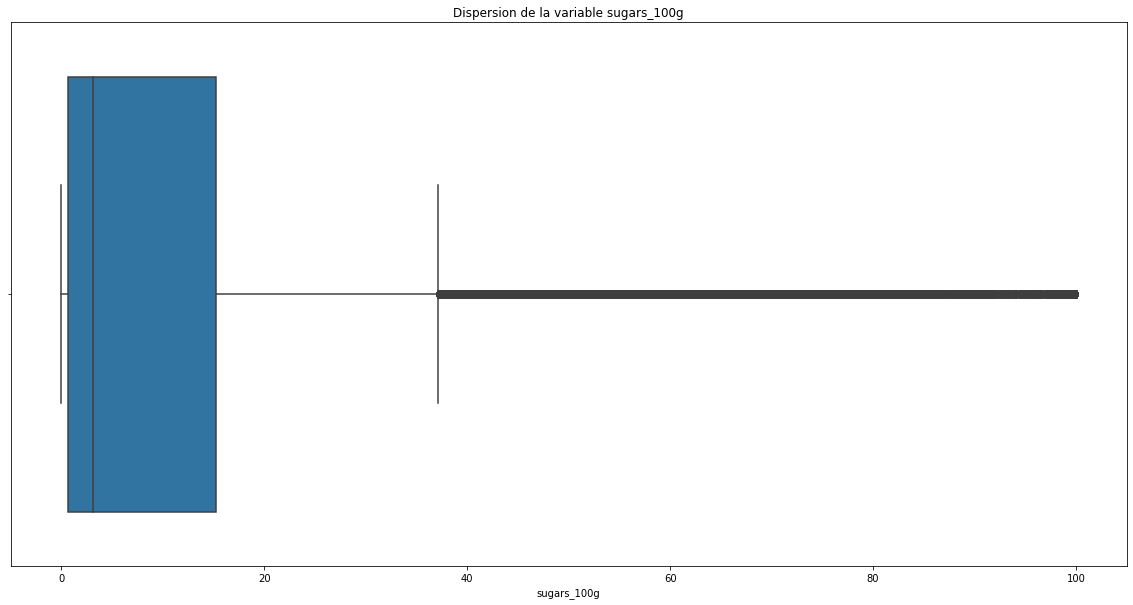

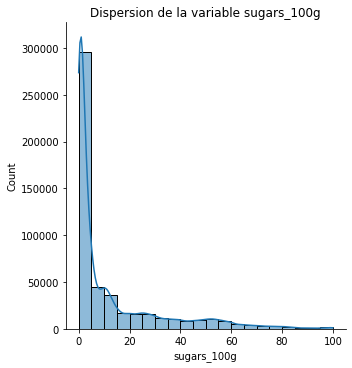

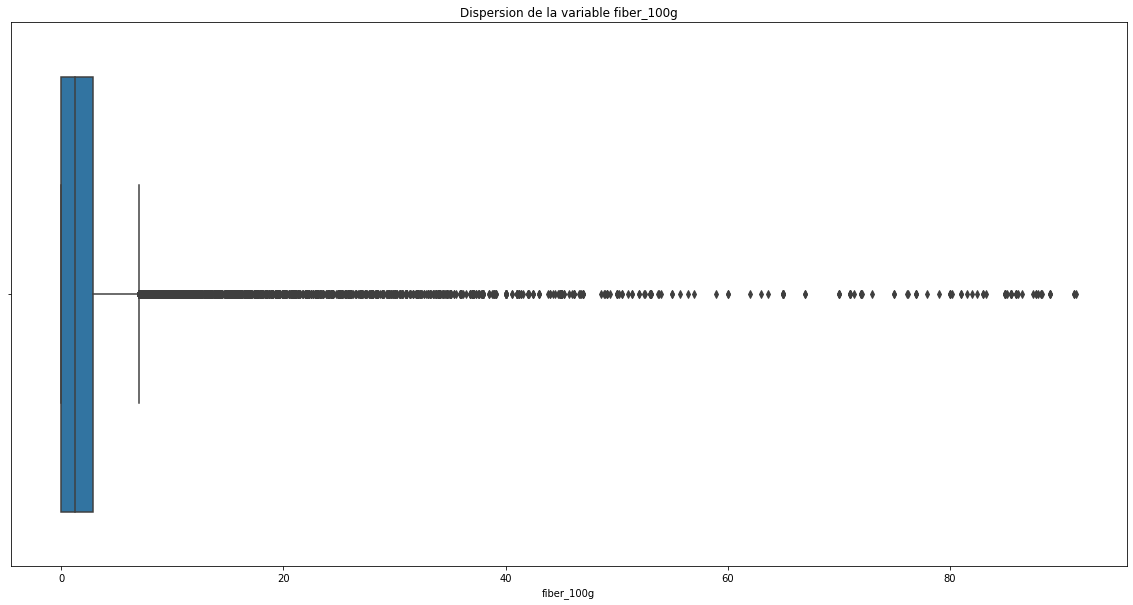

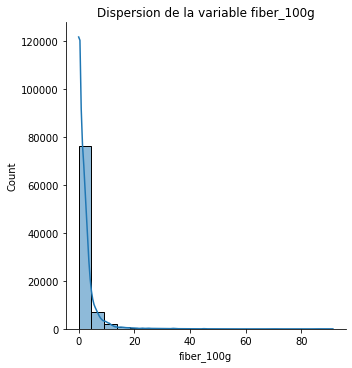

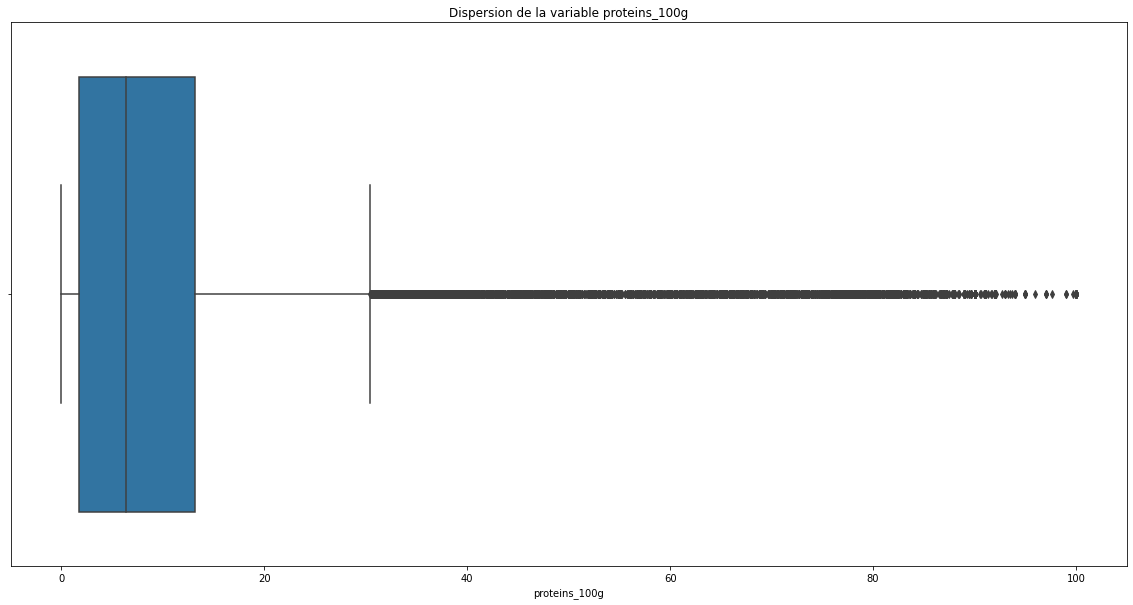

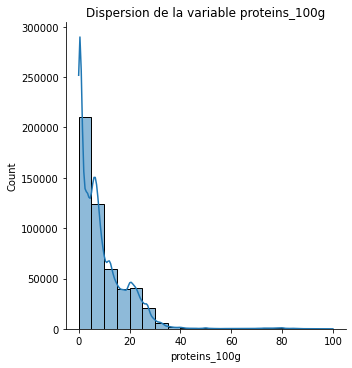

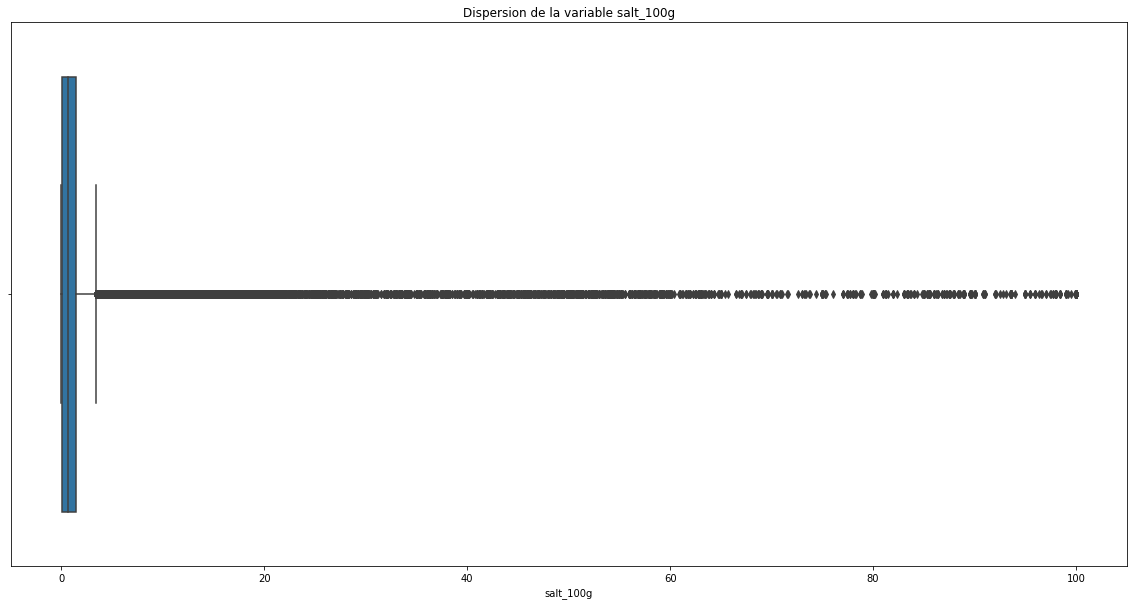

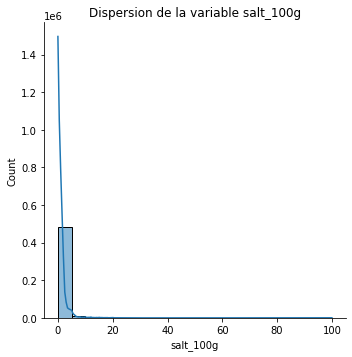

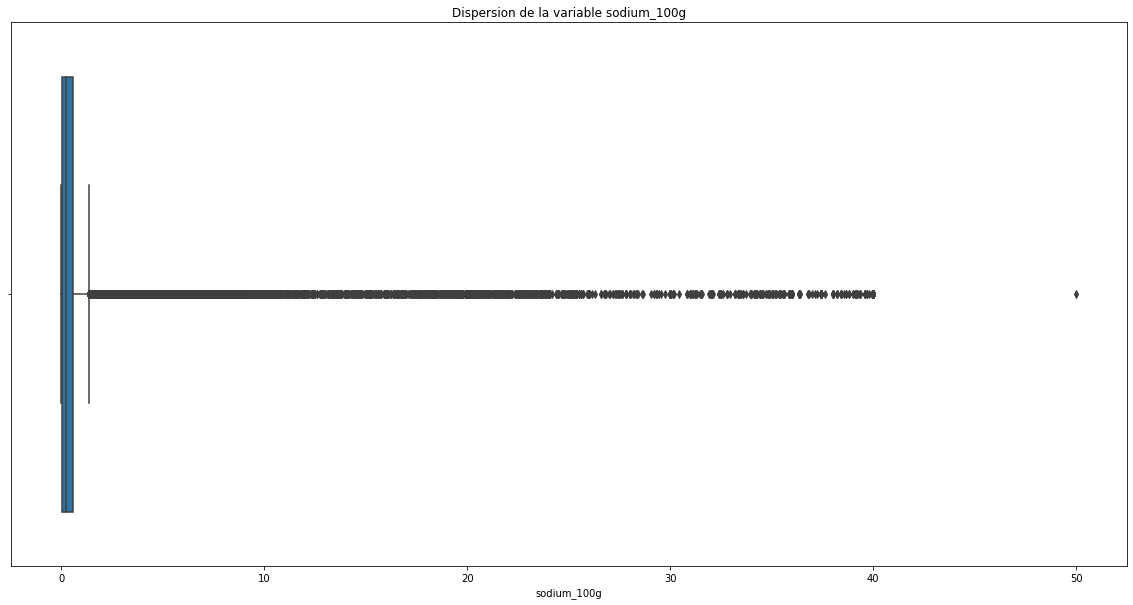

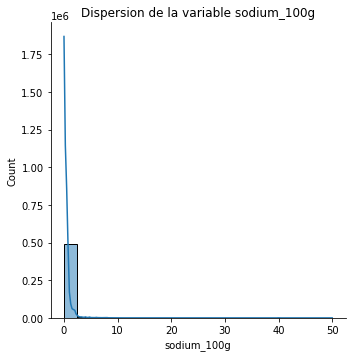

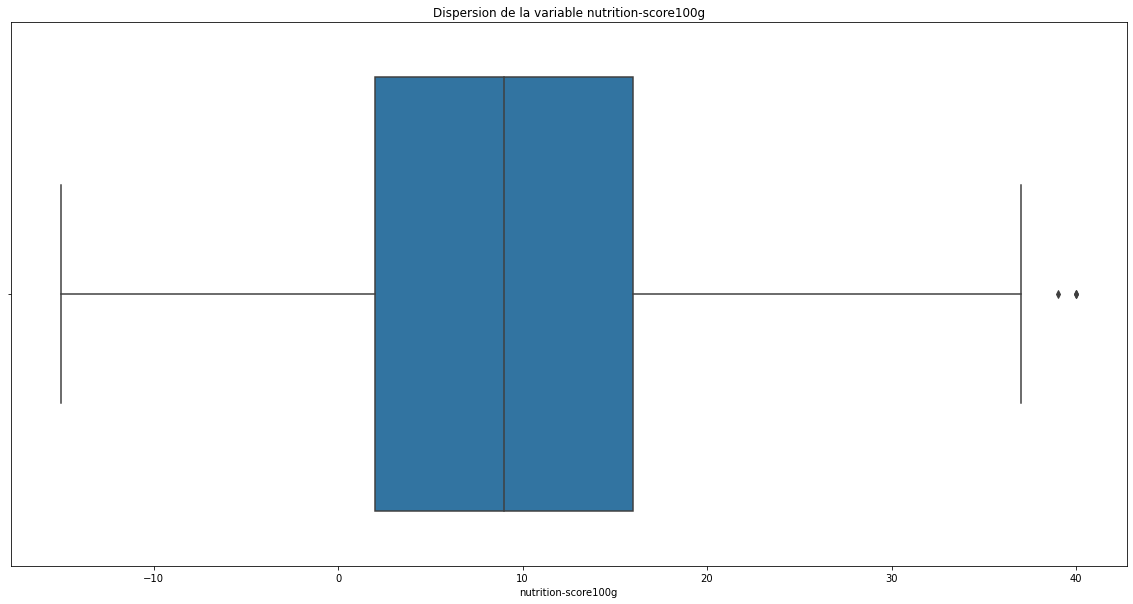

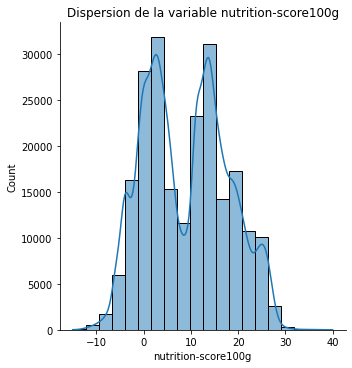

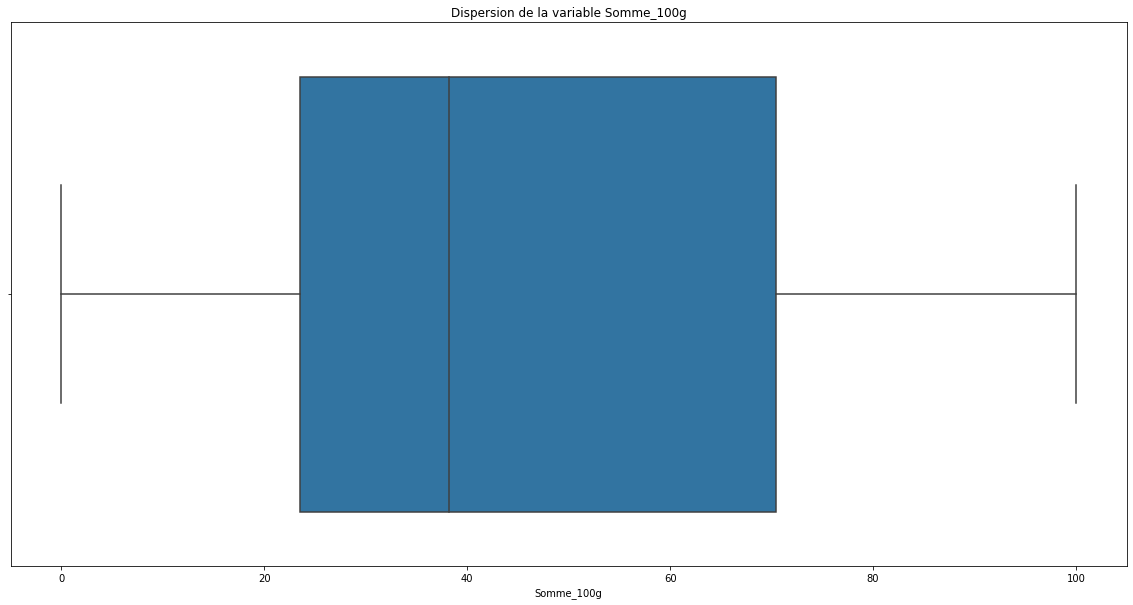

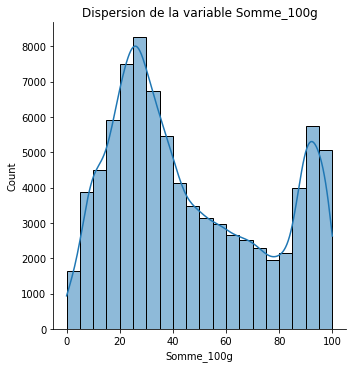

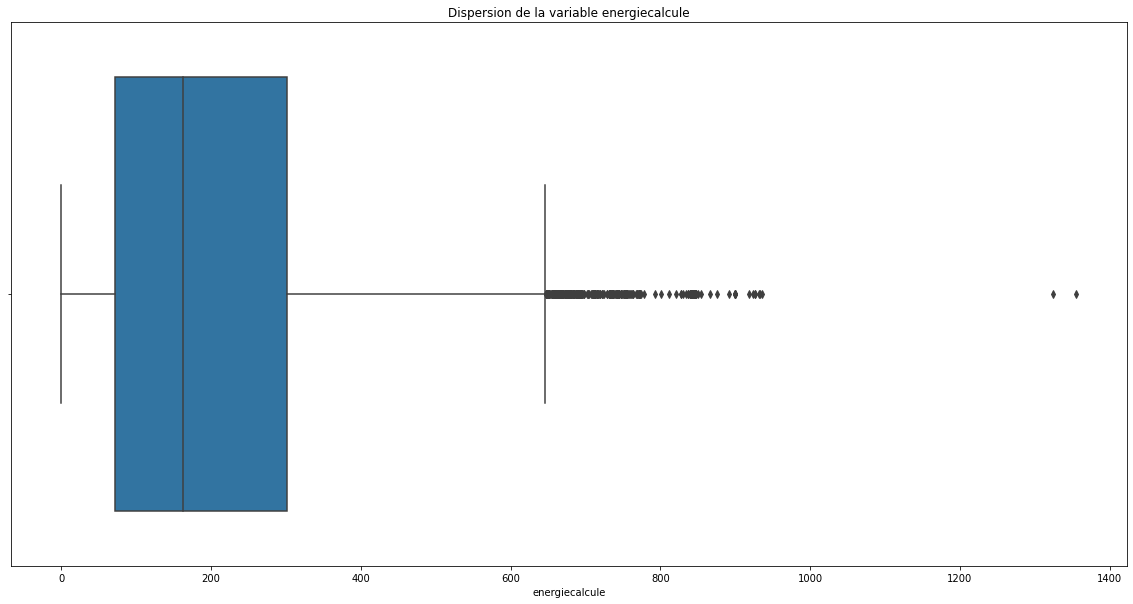

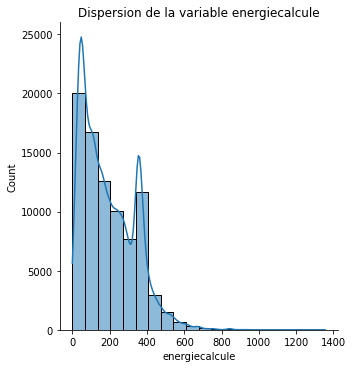

In [ ]:
for col in dataFrance.select_dtypes('float').columns:
  TraceGraphique(dataFrance,col)
  

In [ ]:
#nous voyons que aucune de ces variables n'a l'air symetrique (moyenne=mediane)
#calcul du coeff dasymetrie  

## Calcul coefficient d'asymétrie

In [ ]:
for col in numeric:
  #https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
#la valeur d'asymétrie doit etre comprise entre -1 et 1
  
  print('le coefficient d asymetrie de {} est de {}'.format(col,num_data[col].skew()))

le coefficient d asymetrie de additives_n est de 2.3778204636451177
le coefficient d asymetrie de ingredients_from_palm_oil_n est de 5.161063182231964
le coefficient d asymetrie de ingredients_that_may_be_from_palm_oil_n est de 4.481626006900166
le coefficient d asymetrie de nova_group est de -1.5634894417976353
le coefficient d asymetrie de Energiekcal est de 0.9282808501032409
le coefficient d asymetrie de fat_100g est de 2.146911939826923
le coefficient d asymetrie de saturated-fat_100g est de 3.0714633273062537
le coefficient d asymetrie de carbohydrates_100g est de 0.85907239886969
le coefficient d asymetrie de sugars_100g est de 1.9645172629311294
le coefficient d asymetrie de fiber_100g est de 7.636403517230335
le coefficient d asymetrie de proteins_100g est de 2.6017277879113823
le coefficient d asymetrie de salt_100g est de 14.569225320238482
le coefficient d asymetrie de sodium_100g est de 14.590449072695359
le coefficient d asymetrie de nutrition-score100g est de 0.157239460

## Identification valeurs aberrantes en regardant l'ecart interquartile

In [ ]:
num_data.shape #dataframe numerique
#542266 et 16 colonnes

(542266, 16)

In [ ]:

#identiification valeur aberrantes
#calcul du premier quartile et du troisieme quartile 
Q1=num_data.quantile(0.25)
Q3=num_data.quantile(0.75)
IQR=Q3-Q1


#print(IQR)
#on ne peut pas utiliser 1.5 car les distributions ne sont pas symetriques
#essayons d'utiliser les valeurs 3 à 5 pour voir combien de données je perds
Nbreinter3=(num_data < (Q1 - 3 * IQR)) |(num_data > (Q3 + 3 * IQR))
Nbreinter4=(num_data < (Q1 - 4 * IQR)) |(num_data > (Q3 +  4 * IQR))
Nbreinter5=(num_data < (Q1 - 5 * IQR)) |(num_data > (Q3 +  5 * IQR))

In [ ]:
l=num_data.columns
p=list(l)
type(p)
df=pd.DataFrame(p,columns=['Variables numeriques'])

In [ ]:
df['Nombre de lignes perdus pour 3']=0
df['Nombre de lignes perdus pour 4']=0
df['Nombre de lignes perdus pour 5']=0

for j in range(0,df.shape[0]):
  i=Nbreinter3[df.iloc[j,0]]== True
  df.iloc[j,1]=Nbreinter3[df.iloc[j,0]][i].shape[0]
  u=Nbreinter4[df.iloc[j,0]]== True
  df.iloc[j,2]=Nbreinter4[df.iloc[j,0]][u].shape[0]
  v=Nbreinter5[df.iloc[j,0]]== True
  df.iloc[j,3]=Nbreinter5[df.iloc[j,0]][v].shape[0]


In [ ]:
df #pour chaque variable nous avons le nombre de valeurs aberrantes quon va supprimer 
#le nombre d'individus 


,Variables numeriques,Nombre de lignes perdus pour 3,Nombre de lignes perdus pour 4,Nombre de lignes perdus pour 5
0,additives_n,4008,1829,891
1,ingredients_from_palm_oil_n,6637,6637,6637
2,ingredients_that_may_be_from_palm_oil_n,15935,15935,15935
3,nova_group,0,0,0
4,Energiekcal,642,97,11
5,fat_100g,6019,0,0
6,saturated-fat_100g,3951,2571,2069
7,carbohydrates_100g,0,0,0
8,sugars_100g,21205,8815,2508
9,fiber_100g,2342,1650,1291


## Fonction qui calcule les valeurs aberrantes et nous donne les index et valeur

In [ ]:
#fonction qui calcule les outliers ou l'utilisateur choisit son 
#ecart 1.5,3 ou 5
#il nous retourne les index les valeurs 
#en entree il nous donne le nom de la colonne 
def CalculOutlier(v):
  ecart=input('Donnez votre écart = ')
  ecart=float(ecart) #conversion de ecart en float
  #cette fonction nous donne les index et valeurs des valeurs aberrantes
  #le nom de la colonne
  Q1=v.quantile(0.25)
  Q3=v.quantile(0.75)
  EIQ=Q3-Q1
  LI=Q1-ecart*EIQ
  LS=Q3+ecart*EIQ
  i=list(v.index[(v < LI)|(v > LS)])
  val=list(v[i])
  print('Voila votre résultat pour un ecart interquartile de {}'.format(ecart))
  return i, val
  

In [ ]:
#test avec la variable ingredients that may be from palm oil
outlier=CalculOutlier(num_data['ingredients_that_may_be_from_palm_oil_n'])
#outlier[0]#donne les index
#outlier[1]#donne les valeurs 

Donnez votre écart = 1.5
Voila votre résultat pour un ecart interquartile de 1.5


In [ ]:
i=outlier[0]
num_data.loc[i,'ingredients_that_may_be_from_palm_oil_n'] 

num_data['ingredients_that_may_be_from_palm_oil_n'][i]


135       1.0
173       1.0
201       3.0
264       1.0
284       1.0
         ... 
541737    1.0
541949    1.0
541980    1.0
541982    1.0
542116    2.0
Name: ingredients_that_may_be_from_palm_oil_n, Length: 15935, dtype: float64

## Comparaison du nombre d'individus perdus pour chaque ecart 


In [ ]:
num_data.shape

(542266, 16)

In [ ]:
Q1=num_data.quantile(0.25)
Q3=num_data.quantile(0.75)
IQR=Q3-Q1
#~2 est egal à-3
#~ tilde permet de mettre la negation de ce qui suit
#on cherche les valeurs aberrantes des quon les a trouve on prend leur contraire en utilisan ~ 
#pour les afficher
num_data3 = num_data[~((num_data < (Q1 - 3 * IQR)) |(num_data > (Q3 + 3 * IQR))).any(axis=1)]
num_data4 = num_data[~((num_data < (Q1 - 4 * IQR)) |(num_data > (Q3 + 4 * IQR))).any(axis=1)]
num_data5 = num_data[~((num_data < (Q1 - 5 * IQR)) |(num_data > (Q3 +  5 * IQR))).any(axis=1)]
print('Pour un ecart de 3 on obtient',num_data3.shape,'Pour un ecart de 4 on obtient',num_data4.shape,
      'Pour un ecart de 5 on obtient', num_data5.shape)

Pour un ecart de 3 on obtient (471428, 16) Pour un ecart de 4 on obtient (496630, 16) Pour un ecart de 5 on obtient (506074, 16)


In [ ]:
liste=[num_data.shape[0],num_data3.shape[0],num_data4.shape[0],num_data5.shape[0]]
df=pd.DataFrame(liste,index=['avec outlier','écart egal à 3','ecart egal à4','ecart egal à 5'],columns=['Nombre de lignes'])


In [ ]:
df
#df.iloc[0,0]
#df.iloc[1,0]
df['pourcentage']=0 #pourcentage represente le nombre de lignes qui restent
df['lignes perdus']=0
for i in range(0,df.shape[0]):
  df.iloc[i,1]=((df.iloc[i,0])*100/ df.iloc[0,0])
  df.iloc[i,2] = - (df.iloc[i,0])+(df.iloc[0,0])


In [ ]:
df #tableau qui recapitule le nombre de lignes quon perd on utilisant 3,4 ou5


,Nombre de lignes,pourcentage,lignes perdus
avec outlier,542266,100.000000,0
écart egal à 3,471428,86.936669,70838
ecart egal à4,496630,91.584204,45636
ecart egal à 5,506074,93.325785,36192


In [ ]:
#nous voyons pour un ecart interquartile egal à 3 on perd 70838 on va
#prendre cet ecart pour la suite de notre etude
#apres avoir regarder les autres ecarts pour 4 et 5 il nous reste encore 
#des outliers on va utiliser 3
#base de travail num_data3 variable numerique
#cat_data variable categorielle
#en utilisant les ecart interquartile 3,4,5 nous perdons l'information sur les ingrédients 
#provenant de lhuile de palme 


## Suppression des variables huile de palme 

In [ ]:
num_data3.ingredients_from_palm_oil_n.max()#egal a 0
#la valeur est nulle
num_data3.ingredients_that_may_be_from_palm_oil_n.max()
#la valeur est nulle 

0.0

In [ ]:
num_data3=num_data3.drop(columns=['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n'])
#suppression de ces deux variables 

In [ ]:
num_data3.shape

(471428, 14)

## Graphique aprés suppression valeur aberrante

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this wa

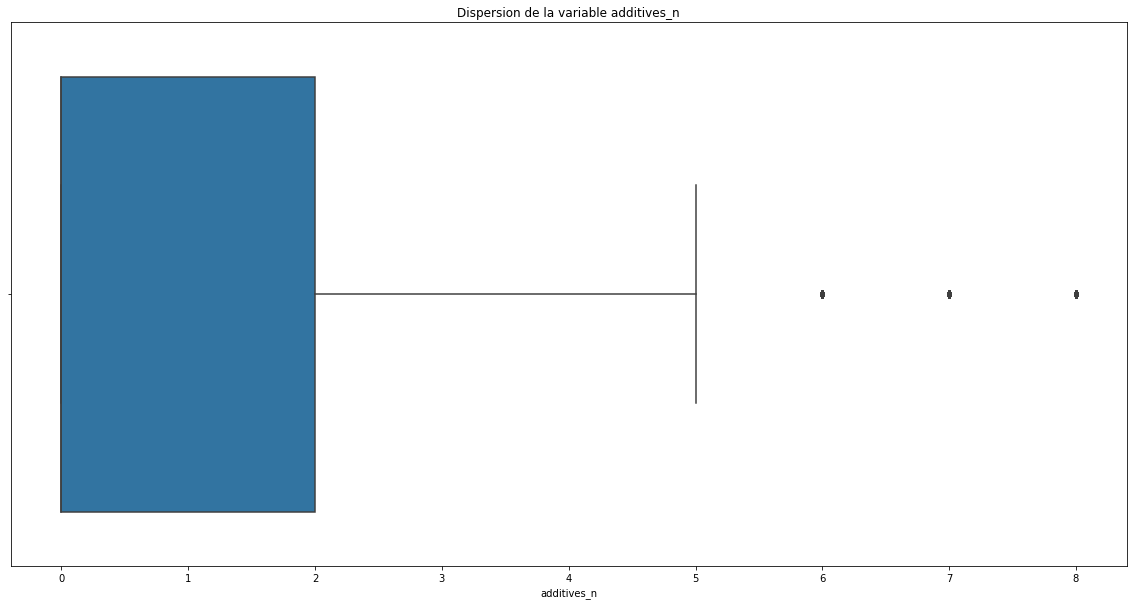

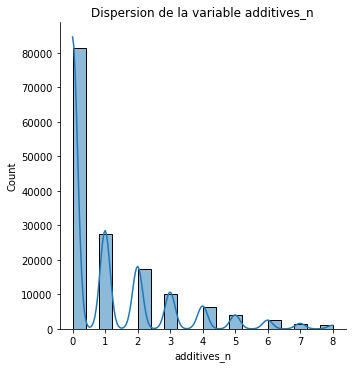

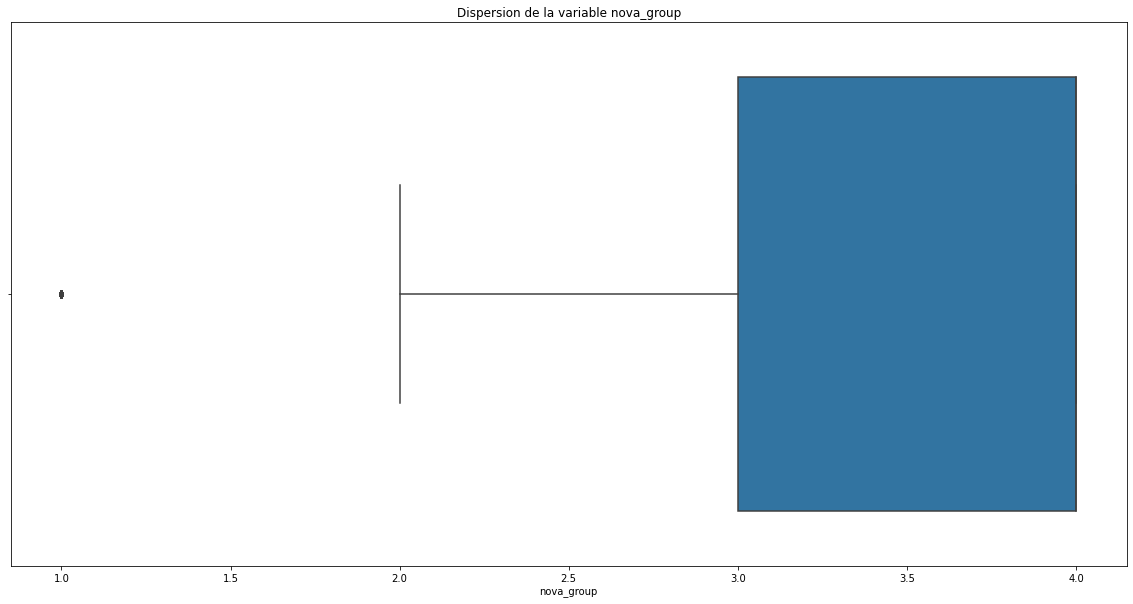

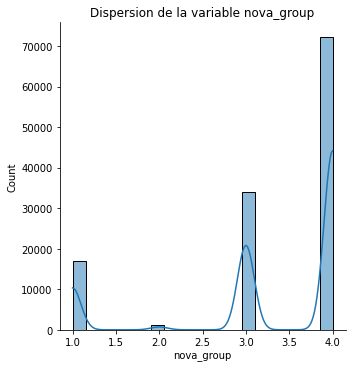

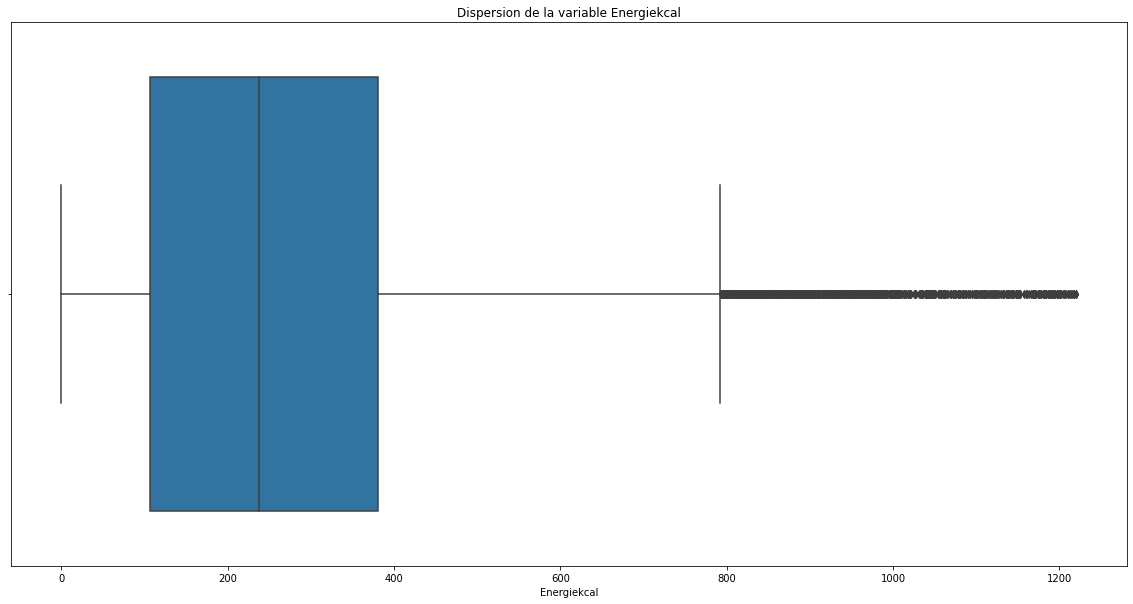

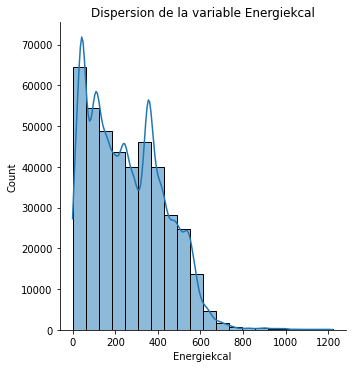

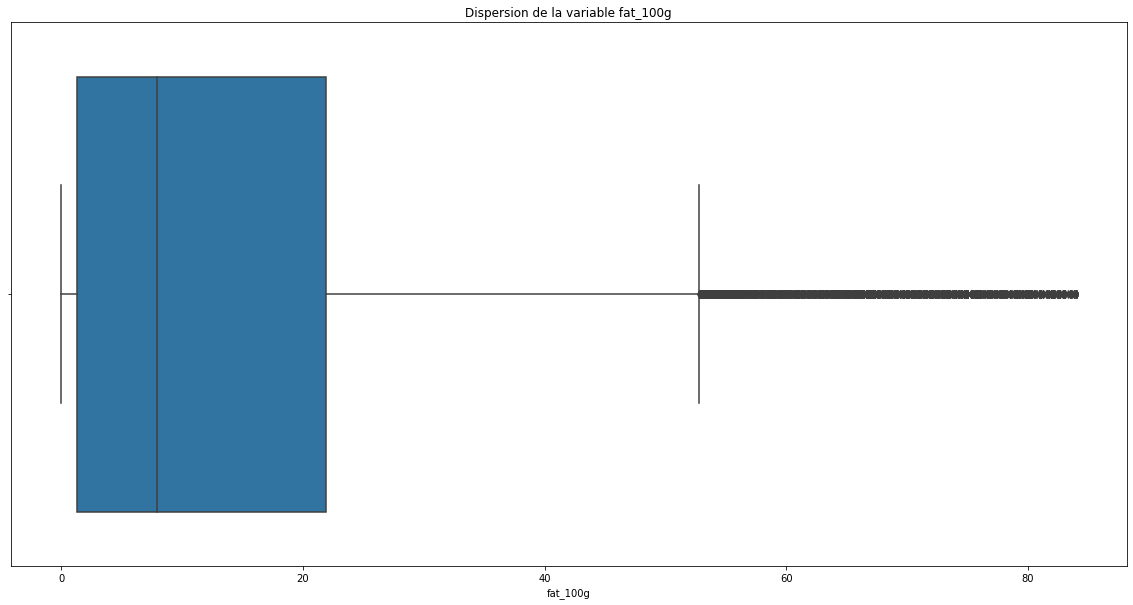

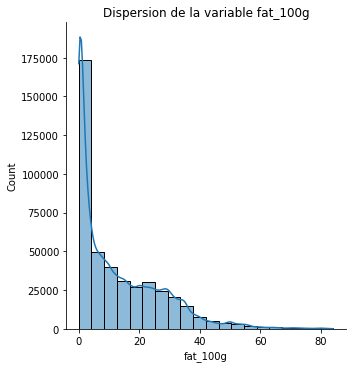

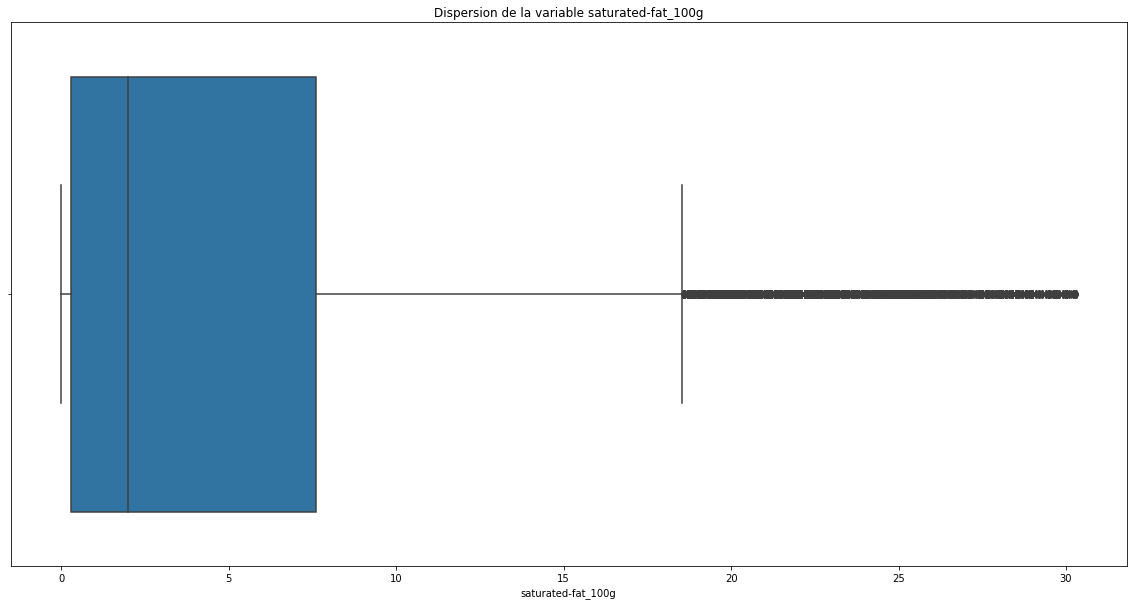

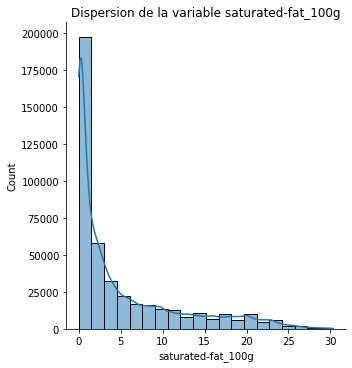

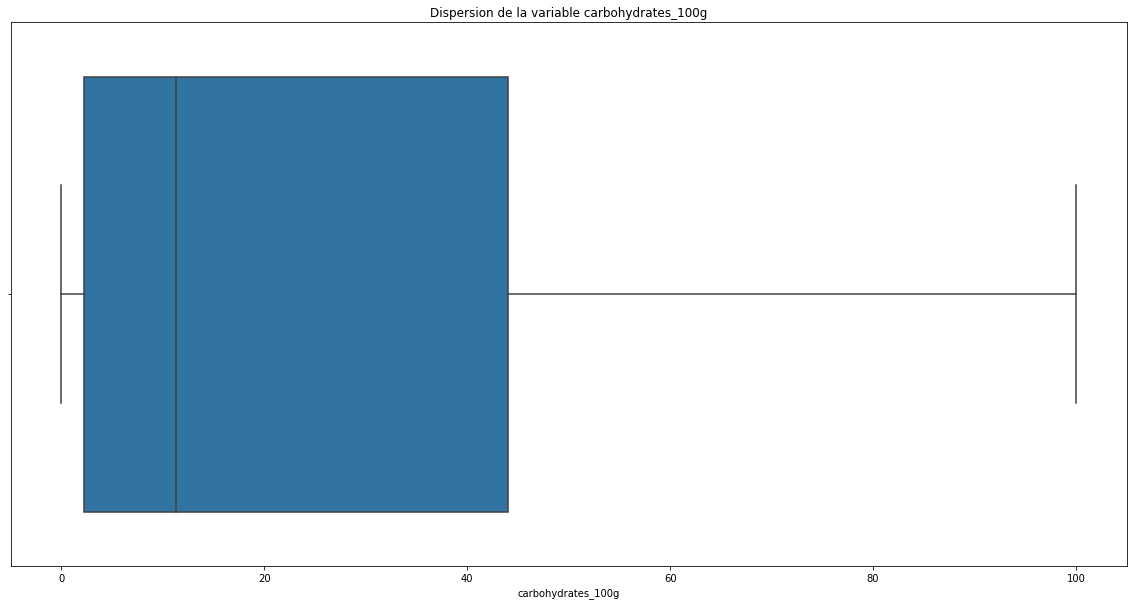

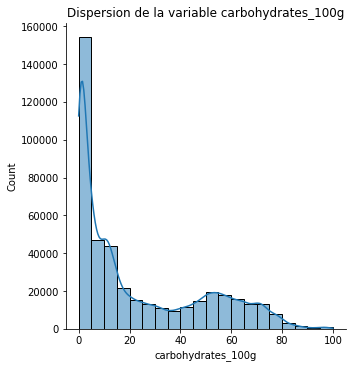

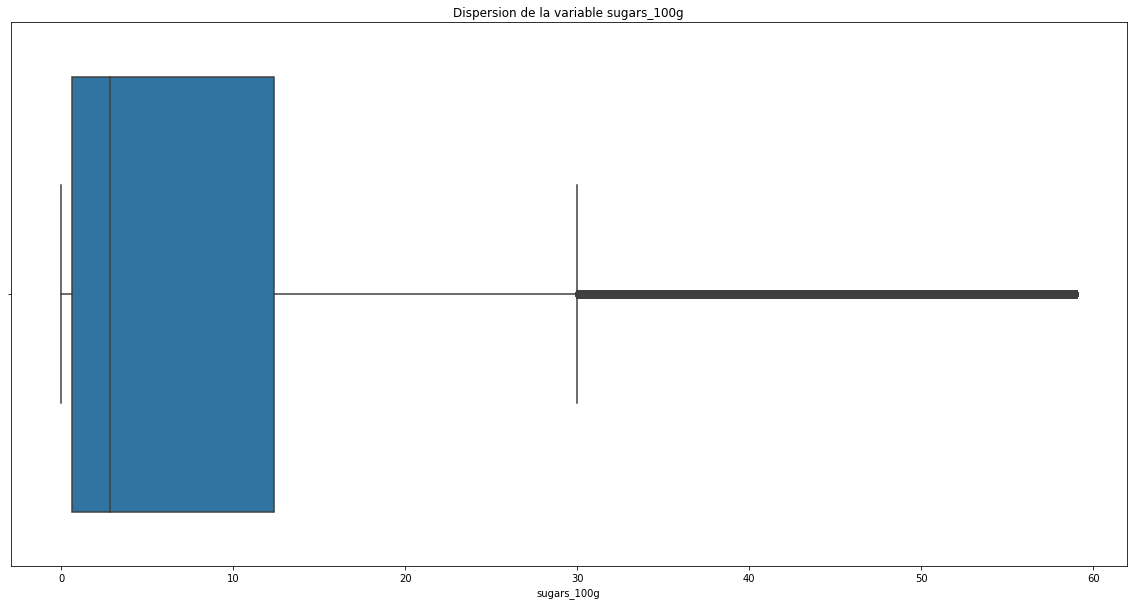

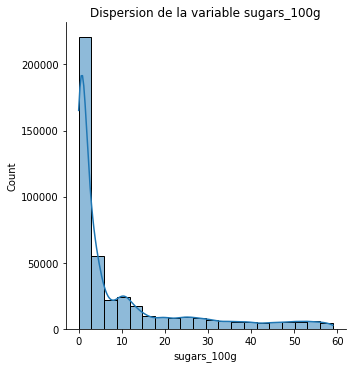

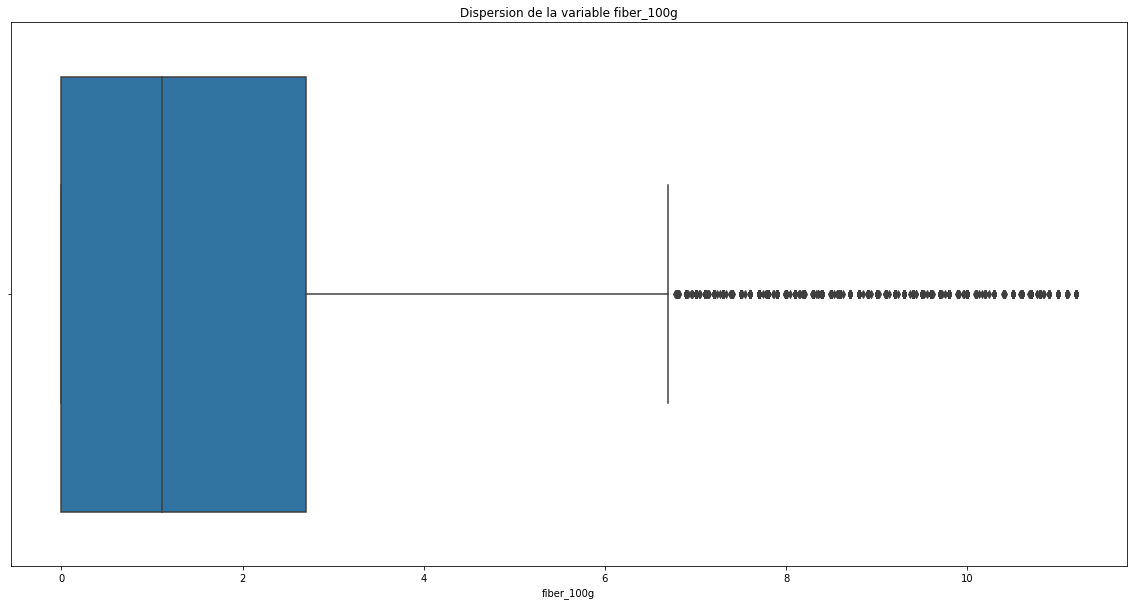

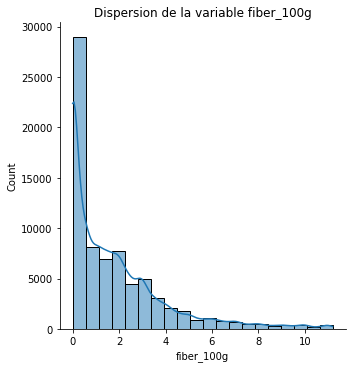

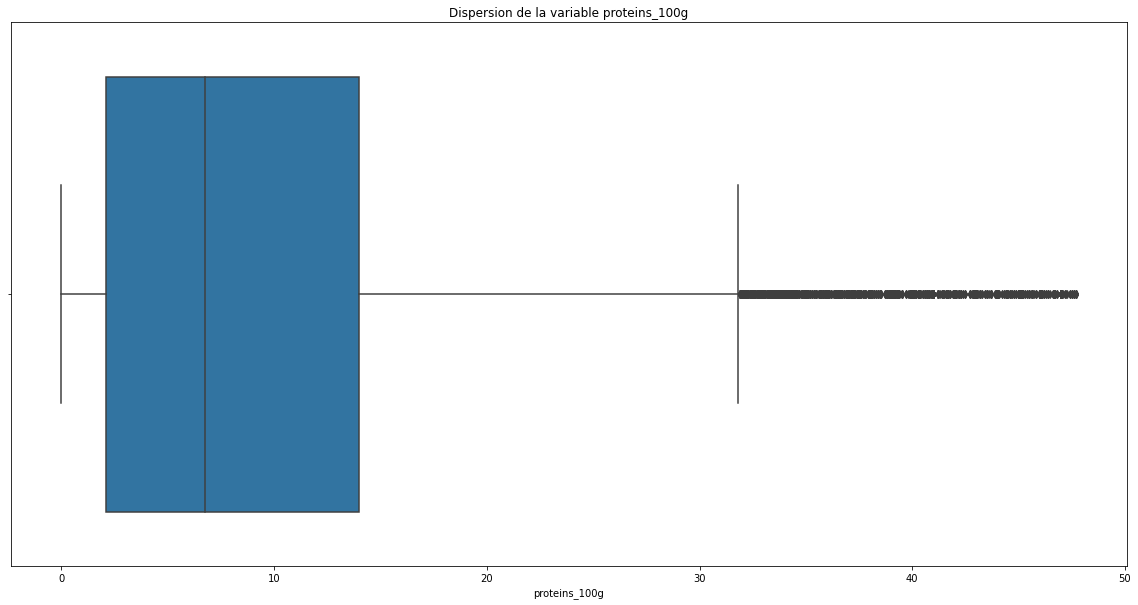

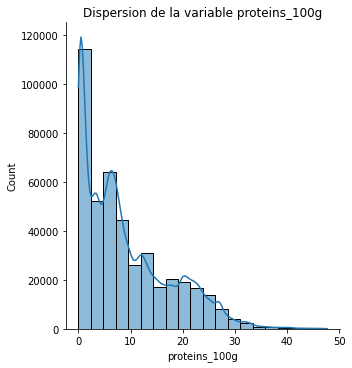

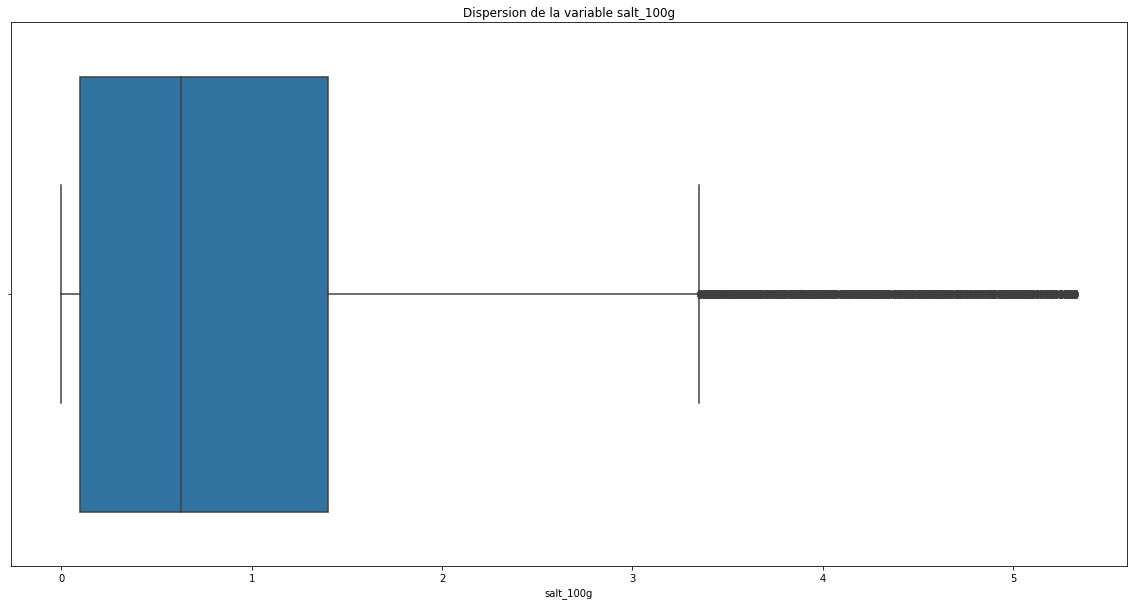

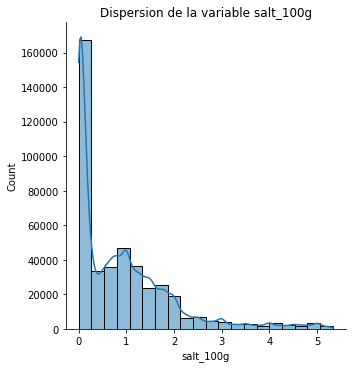

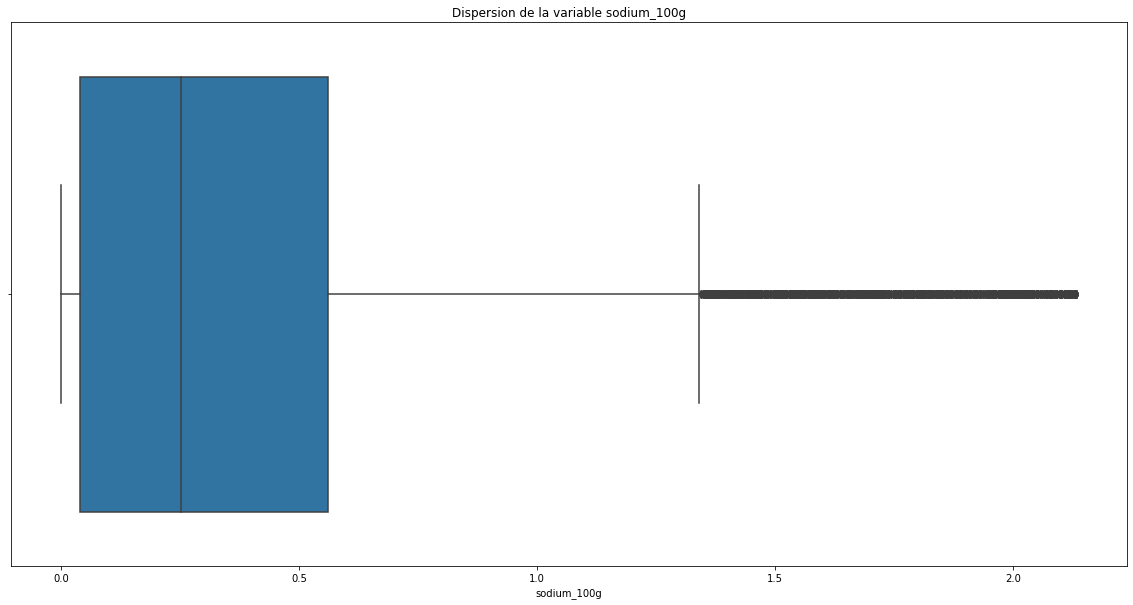

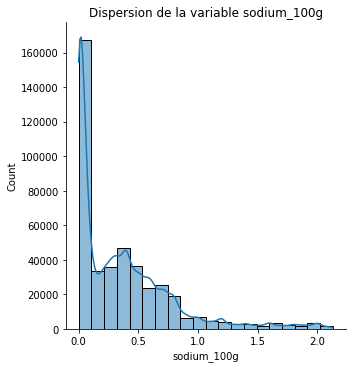

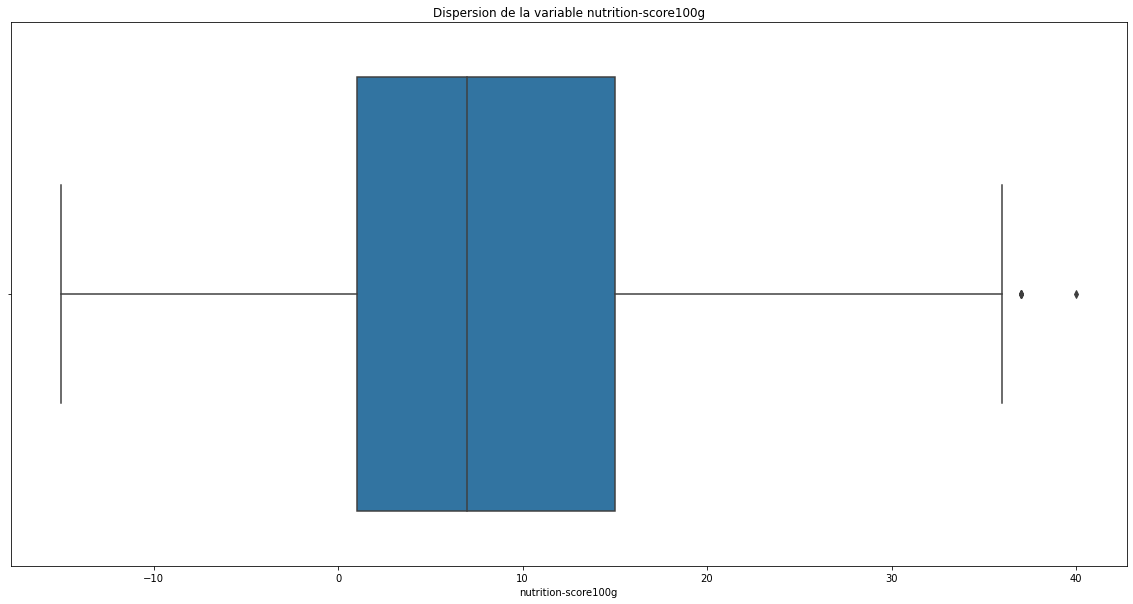

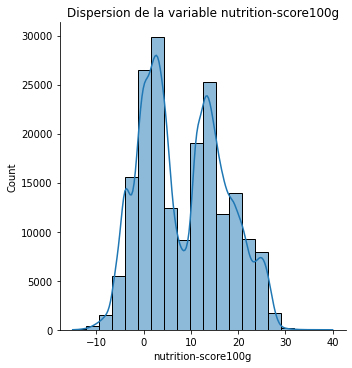

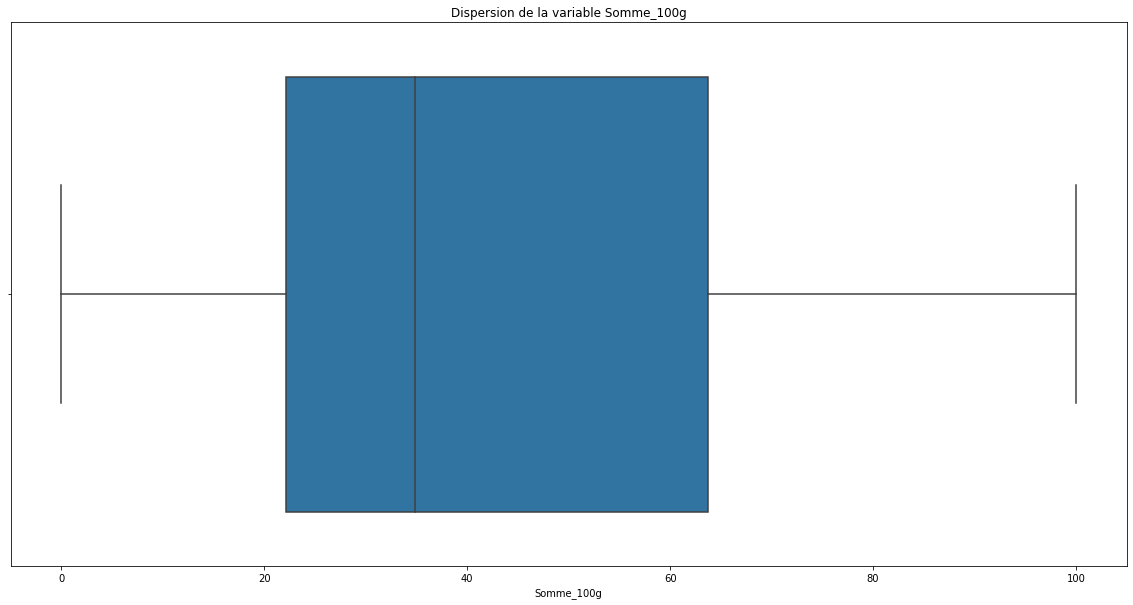

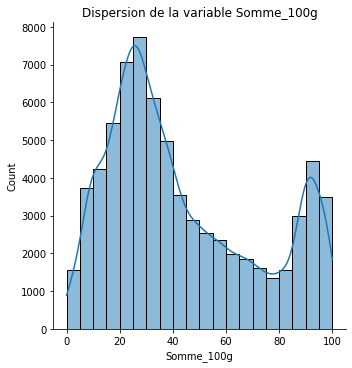

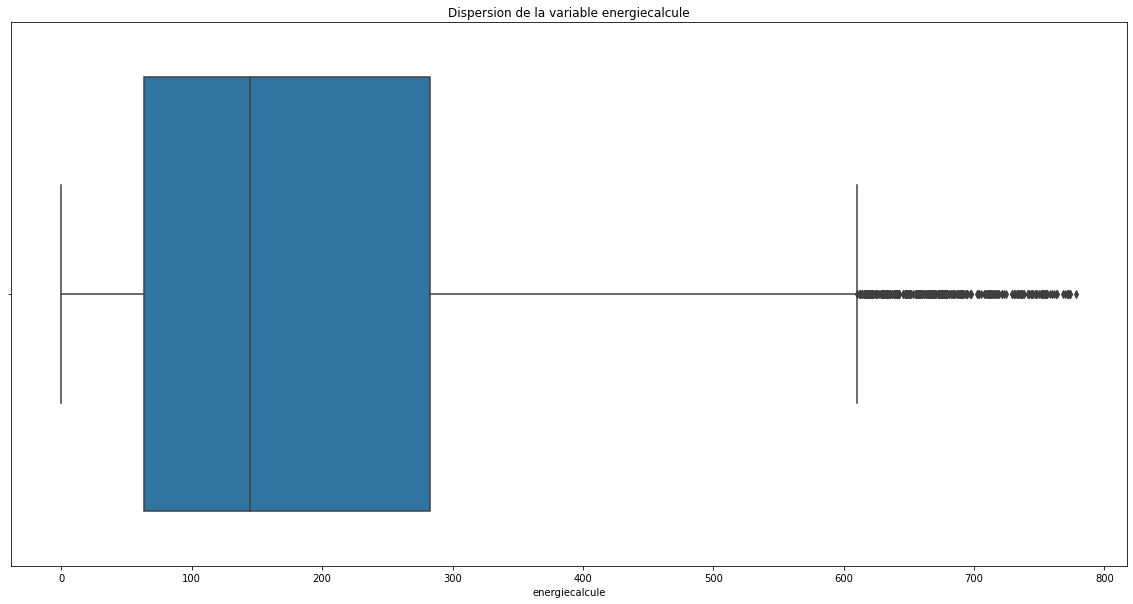

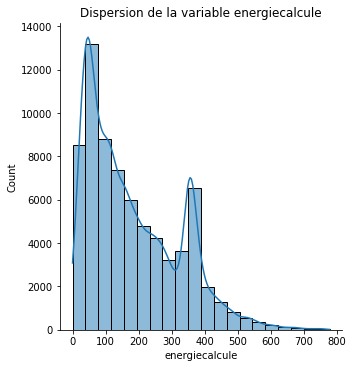

In [ ]:
#graphique des valeurs quantitatives pour num_data3
for col in num_data3.columns:
  TraceGraphique(num_data3,col)

# FILTRE N° 16( Etude de notre base finale) 

In [ ]:
dataPropre=pd.concat([cat_data,num_data3],axis=1)
#concatenation de nos deux tableaux categorielles et quantitatives 
dataPropre.shape #542266 lignes et 53 colonnes
dataPropre=dataPropre.reset_index(drop=True)


In [ ]:
#en regardant notre boite a moustache nous voyons quil y quelques valeurs > 50
i=dataPropre['fat_100g'] >50
dataPropre[['product_name','fat_100g']][i]
#8965

,product_name,fat_100g
125,Organisé pesto alla genovese,64.500000
126,Organic vegan pesto,64.599998
127,Organic pesto with Tofu,62.700000
128,Organic walnut cream,67.100000
208,From.fond.ste Creme 23%MG,83.000000
...,...,...
541793,Gourmand vegetal andros,52.500000
541822,amandes au citron,54.000000
541844,Verb,55.000000
541855,Test Caro Aia,63.300000


In [ ]:
#suppression de l'individu Bonzour monzieur z'ezbere gue vous zallez bien 	
#qui n'est pas un produit
#juste une blague
dataPropre=dataPropre.drop(index=541915)

In [ ]:
Missing(dataPropre.select_dtypes('float'))

additives_n            72.016450
nova_group             77.077444
Energiekcal            23.887767
fat_100g               19.601118
saturated-fat_100g     19.520345
carbohydrates_100g     19.630439
sugars_100g            19.488995
fiber_100g             86.324214
proteins_100g          19.294256
salt_100g              20.689146
sodium_100g            20.689331
nutrition-score100g    64.972108
Somme_100g             86.817700
energiecalcule         86.753340
dtype: float64

In [ ]:
dataPropre.select_dtypes('float').columns

Index(['additives_n', 'nova_group', 'Energiekcal', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score100g',
       'Somme_100g', 'energiecalcule'],
      dtype='object')

In [ ]:
#on va supprimer quelques variables utilisés pour la filtration 
#energiecalcule et somme100g
dataPropre=dataPropre.drop(columns=['energiecalcule','Somme_100g'])
dataPropre=dataPropre.reset_index(drop=True)

In [ ]:
dataPropre.shape

(542265, 50)

In [ ]:
dataPropre.select_dtypes('float').columns #12 variables 

Index(['additives_n', 'nova_group', 'Energiekcal', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score100g'],
      dtype='object')

## Taux de remplissage et taux de valeurs manquantes 

les colonnes vides sont:




[]

,code,creator,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,additives_tags,additives_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,additives_n,nova_group,Energiekcal,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score100g
number of missing values,0,1,0,484597,350851,414371,414376,223026,223055,271868,271868,271868,487749,487774,357158,357148,357148,471495,471508,468514,436221,0,356034,477976,501518,489388,489388,488157,446290,446290,321214,6746,0,0,0,0,271868,271868,390520,417964,129535,106290,105852,106449,105682,468106,104626,112190,112191,352321
number of values,542265,542264,542265,57668,191414,127894,127889,319239,319210,270397,270397,270397,54516,54491,185107,185117,185117,70770,70757,73751,106044,542265,186231,64289,40747,52877,52877,54108,95975,95975,221051,535519,542265,542265,542265,542265,270397,270397,151745,124301,412730,435975,436413,435816,436583,74159,437639,430075,430074,189944
fill_rate,1,0.999998,1,0.106347,0.35299,0.235851,0.235842,0.588714,0.588661,0.498644,0.498644,0.498644,0.100534,0.100488,0.341359,0.341377,0.341377,0.130508,0.130484,0.136005,0.195558,1,0.343432,0.118556,0.0751422,0.0975114,0.0975114,0.0997815,0.176989,0.176989,0.407644,0.98756,1,1,1,1,0.498644,0.498644,0.279836,0.229226,0.761122,0.803989,0.804797,0.803696,0.80511,0.136758,0.807057,0.793109,0.793107,0.350279


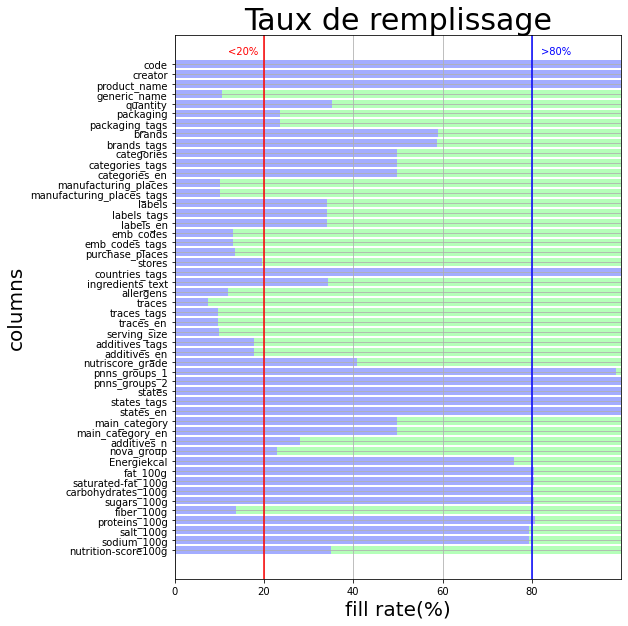

In [ ]:
TraceValeurMissing(dataPropre)

## Statistiques Univaries

In [ ]:

dataPropre.describe()
#les statistiques univariées

,additives_n,nova_group,Energiekcal,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score100g
count,151745.000000,124301.000000,412730.000000,435975.000000,436413.000000,435816.000000,436583.000000,74159.000000,437639.000000,430075.000000,430074.000000,189944.000000
mean,1.130113,3.299998,256.805845,12.938401,5.064450,23.039684,9.985903,1.807002,9.115558,0.904753,0.361903,8.481316
std,1.668492,1.021645,174.893186,14.038688,6.581033,24.930539,14.623367,2.156154,8.382385,1.032988,0.413196,8.713500
min,0.000000,1.000000,0.004187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,3.000000,107.000000,1.300000,0.300000,2.200000,0.600000,0.000000,2.100000,0.100000,0.040000,1.000000
50%,0.000000,4.000000,238.000000,7.900000,2.000000,11.300000,2.800000,1.110000,6.730000,0.630000,0.252000,7.000000
75%,2.000000,4.000000,381.000000,21.900000,7.600000,44.000000,12.350950,2.700000,14.000000,1.400000,0.560000,15.000000
max,8.000000,4.000000,1220.000000,84.000000,30.300000,100.000000,59.000000,11.200000,47.700000,5.330000,2.132000,40.000000


In [ ]:
dataPropre.select_dtypes('float').columns

Index(['additives_n', 'nova_group', 'Energiekcal', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score100g'],
      dtype='object')

##  Matrice de corrélation

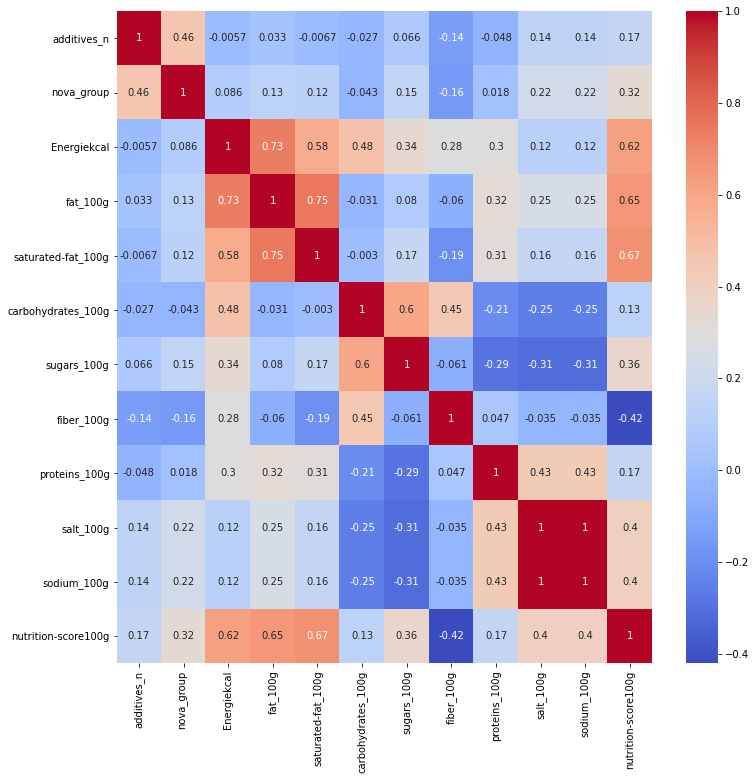

In [ ]:
cor=dataPropre.corr()
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')
#si le coefficient de correlation est superieur a 0.85
#nous concluons que ces deux variables donnnent la meme information 


In [ ]:
#salt et sodium sont corrélées on va le garder pour faire notre imputation 
#en utilisant l'iterative imputer 

## Relation variables quantitatives avec notre nutriscore grade

In [ ]:
#fonction qui calcule le eta squared
def anova_table():
    aov_table = sm.stats.anova_lm(model, typ=2)
    aov_table['mean_sq'] = aov_table[:]['sum_sq']/aov_table[:]['df']
    #meansq moyenne
    #eta squared rapport de correlation 0pas de rellation entre les variables
    #1 relation entre les variables
    #omega squared meilleure mesure de la taille de l'effet car
    # il est sans biais dans son calcul en tenant compte les degrés de liberté dans le modèle. 
    aov_table['eta_sq'] = aov_table[:-1]['sum_sq']/sum(aov_table['sum_sq'])
    aov_table['omega_sq'] = (aov_table[:-1]['sum_sq']-(aov_table[:-1]['df']*aov_table['mean_sq'][-1]))/(sum(aov_table['sum_sq'])+aov_table['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq','omega_sq']
    aov_table = aov_table[cols]
    return aov_table

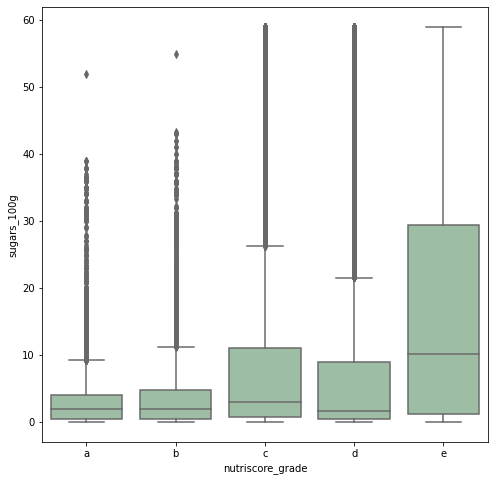

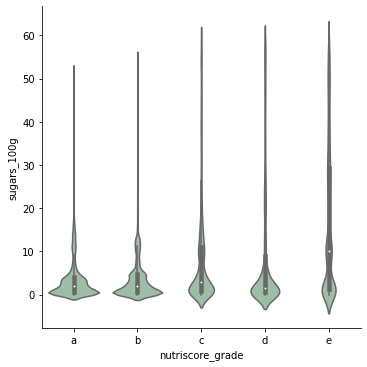

In [ ]:
#on veut savoir si une variable qualitative va influencer 
#sur une variable quantitative sugars_100g
dataPropre['nutriscore_grade'].shape
dataPropre['sugars_100g'].shape
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='sugars_100g', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
ax=sns.catplot(x='nutriscore_grade', y='sugars_100g',kind='violin', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
#ax = sns.swarmplot(x="nutriscore_grade", y="sugars_100g", data=dataPropre1, color='#7d0013')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('sugars_100g ~ C(nutriscore_grade)', data=dataPropre).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
anova_table()
#on pose H0 moyenne de sucre egal pour chaque groupe de nutiscore
#H1 moyenne de sucre nest pas egal pour chaque groupe moyenne differentes
#nous concluons quil existe des différences significatives de moyenne
#car p< 5% on rejette h0
#pour remplacer les valeurs manquantes nous utiliserons la mediane pour limputation

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),3.824555e+06,4.0,956138.798065,5940.0191,0.0,0.111401,0.111382
Residual,3.050685e+07,189524.0,160.965610,NaN,NaN,NaN,NaN


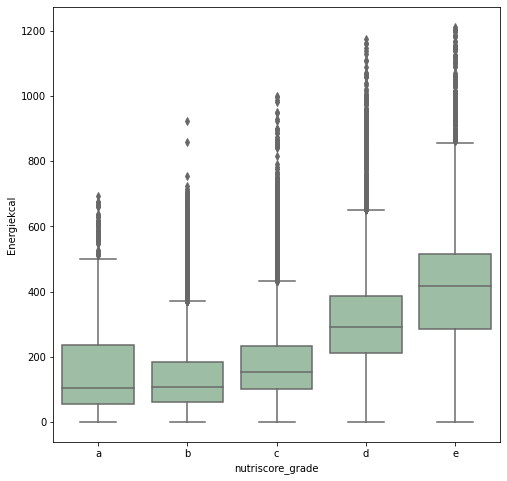

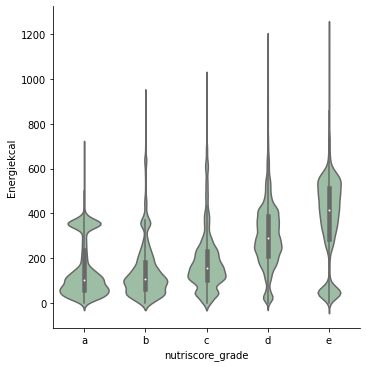

In [ ]:
#pour 'Energiekcal'
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='Energiekcal', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
ax=sns.catplot(x='nutriscore_grade', y='Energiekcal',kind='violin', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
#ax = sns.swarmplot(x="nutriscore_grade", y="sugars_100g", data=dataPropre1, color='#7d0013')
plt.show()

In [ ]:
#anova avec nutriscore et energykcal
# Ordinary Least Squares (OLS) model
model = ols('Energiekcal ~ C(nutriscore_grade)', data=dataPropre).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
anova_table()
#on pose H0 moyenne de lenrgiekcal egal pour chaque groupe de nutiscore
#H1 moyenne de energykcal nest pas egal pour chaque groupe moyenne differentes
#nous concluons quil existe des différences significatives de moyenne
#car p< 5% on rejette h0
#pour remplacer les valeurs manquantes nous utiliserons la mediane pour limputation

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),1.298351e+09,4.0,3.245879e+08,15577.313733,0.0,0.270714,0.270696
Residual,3.497673e+09,167857.0,2.083722e+04,NaN,NaN,NaN,NaN


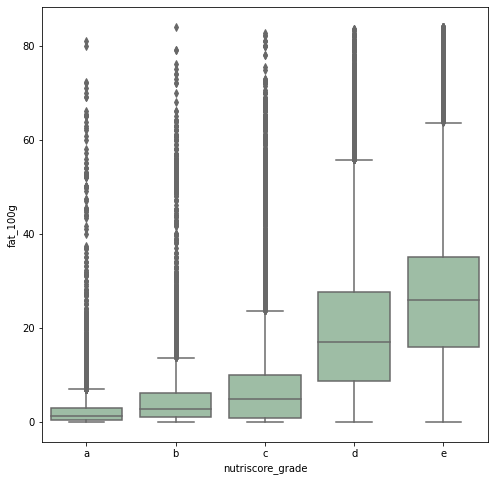

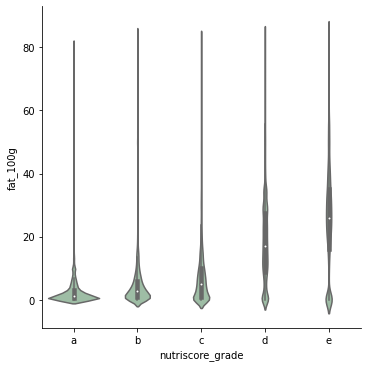

In [ ]:
#fat_100g
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='fat_100g', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
ax=sns.catplot(x='nutriscore_grade', y='fat_100g',kind='violin', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
#ax = sns.swarmplot(x="nutriscore_grade", y="sugars_100g", data=dataPropre1, color='#7d0013')
plt.show()

In [ ]:
#anova avec nutriscore et fat_100g
# Ordinary Least Squares (OLS) model
model = ols('fat_100g ~ C(nutriscore_grade)', data=dataPropre).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
anova_table()
#on pose H0 moyenne de fat_100g egal pour chaque groupe de nutiscore
#H1 moyenne de fat_100g nest pas egal pour chaque groupe moyenne differentes
#nous concluons quil existe des différences significatives de moyenne
#car p< 5% on rejette h0
#pour remplacer les valeurs manquantes nous utiliserons la mediane pour limputation

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),1.297561e+07,4.0,3.243903e+06,22857.327525,0.0,0.325424,0.325409
Residual,2.689731e+07,189525.0,1.419196e+02,NaN,NaN,NaN,NaN


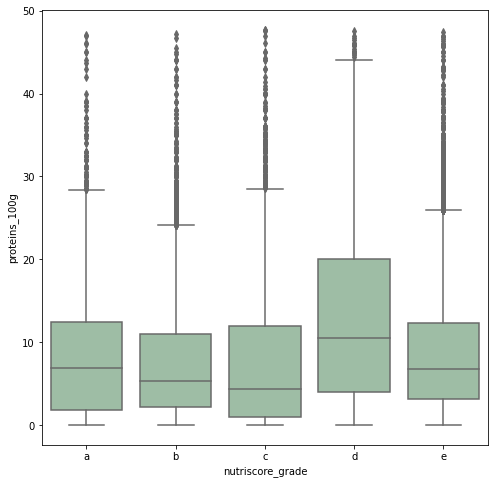

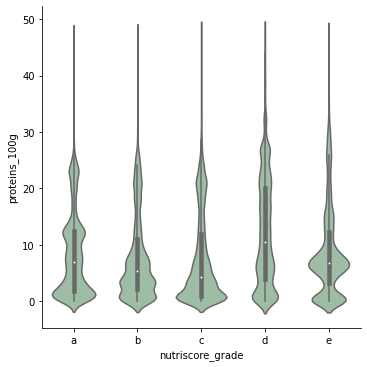

In [ ]:
#'proteins_100g'
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='proteins_100g', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
ax=sns.catplot(x='nutriscore_grade', y='proteins_100g',kind='violin', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
#ax = sns.swarmplot(x="nutriscore_grade", y="sugars_100g", data=dataPropre1, color='#7d0013')
plt.show()

In [ ]:
#anova avec nutriscore et proteins_100g
# Ordinary Least Squares (OLS) model
model = ols('proteins_100g ~ C(nutriscore_grade)', data=dataPropre).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
anova_table()
#on pose H0 moyenne de carbohydrates(glucides) egal pour chaque groupe de nutiscore
#H1 moyenne de carbohydrates nest pas egal pour chaque groupe moyenne differentes
#nous concluons quil existe des différences significatives de moyenne
#car p< 5% on rejette h0
#pour remplacer les valeurs manquantes nous utiliserons la mediane pour limputation
#etasquared = 0 pas de relation

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),6.964087e+05,4.0,174102.182714,2567.909766,0.0,0.05141,0.05139
Residual,1.284971e+07,189526.0,67.799182,NaN,NaN,NaN,NaN


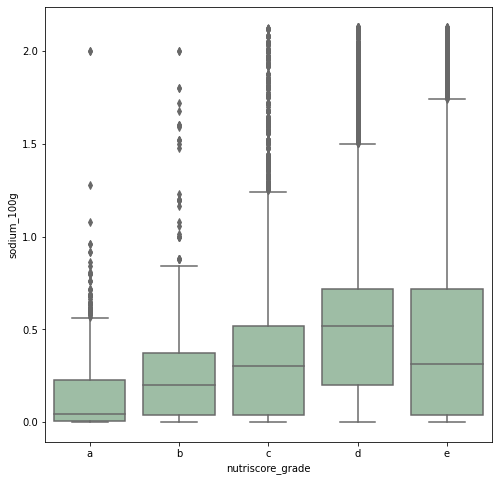

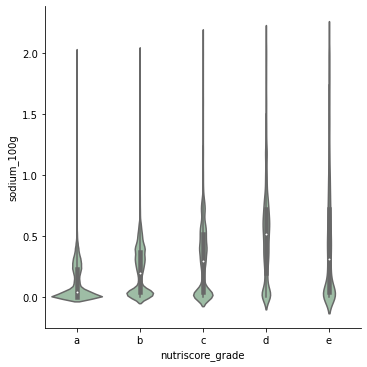

In [ ]:
#sodium_100g
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='sodium_100g', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
ax=sns.catplot(x='nutriscore_grade', y='sodium_100g',kind='violin', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
#ax = sns.swarmplot(x="nutriscore_grade", y="sugars_100g", data=dataPropre1, color='#7d0013')
plt.show()

In [ ]:
#anova avec nutriscore et sodium_100g
# Ordinary Least Squares (OLS) model
model = ols('sodium_100g ~ C(nutriscore_grade)', data=dataPropre).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
anova_table()
#on pose H0 moyenne de sodium egal pour chaque groupe de nutiscore
#H1 moyenne de sodium nest pas egal pour chaque groupe moyenne differentes
#nous concluons quil existe des différences significatives de moyenne
#car p< 5% on rejette h0
#pour remplacer les valeurs manquantes nous utiliserons la mediane pour limputation

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),4754.265281,4.0,1188.566320,8467.849758,0.0,0.151543,0.151524
Residual,26618.153940,189639.0,0.140362,NaN,NaN,NaN,NaN


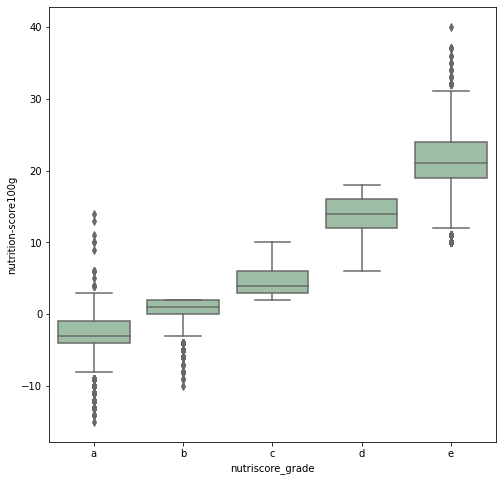

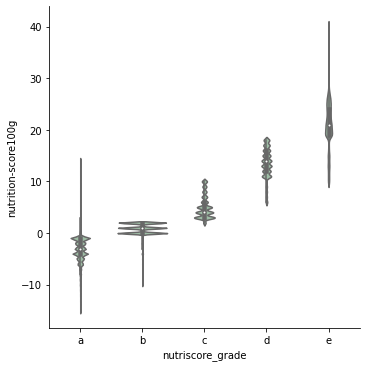

In [ ]:
#nutrition-score100g
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='nutrition-score100g', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
ax=sns.catplot(x='nutriscore_grade', y='nutrition-score100g',kind='violin', data=dataPropre.sort_values(['nutriscore_grade']), color='#99c2a2')
#ax = sns.swarmplot(x="nutriscore_grade", y="sugars_100g", data=dataPropre1, color='#7d0013')
plt.show()

In [ ]:
dataPropre=dataPropre.rename(columns={'nutrition-score100g':'nutritionscore100g'})

In [ ]:
#anova avec nutriscore et salt_100g
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('nutritionscore100g ~ C(nutriscore_grade)', data=dataPropre).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
anova_table()
#on pose H0 moyenne de salt egal pour chaque groupe de nutiscore
#H1 moyenne de salt nest pas egal pour chaque groupe moyenne differentes
#nous concluons quil existe des différences significatives de moyenne
#car p< 5% on rejette h0
#pour remplacer les valeurs manquantes nous utiliserons la mediane pour limputation

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),1.301065e+07,4.0,3.252662e+06,437916.04743,0.0,0.902174,0.902172
Residual,1.410790e+06,189939.0,7.427593e+00,NaN,NaN,NaN,NaN


# Imputation variable quantitative

In [ ]:
dataPropre.select_dtypes('float').columns

Index(['additives_n', 'nova_group', 'Energiekcal', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutritionscore100g'],
      dtype='object')

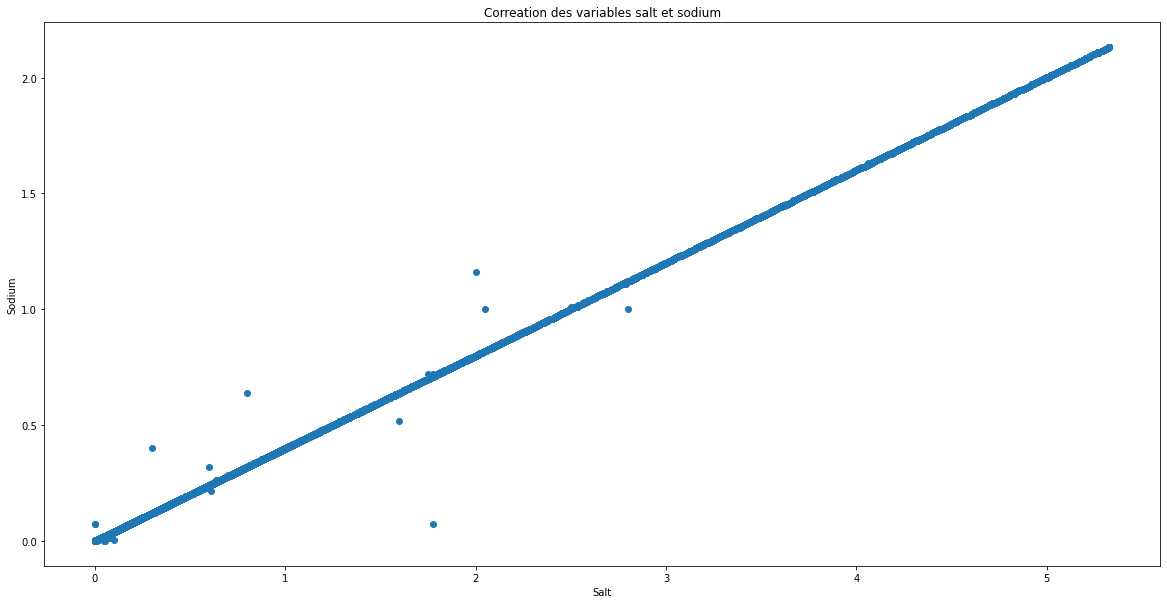

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(x=dataPropre['salt_100g'],y=dataPropre['sodium_100g'],label=['salt','sodium']);
plt.xlabel('Salt')
plt.ylabel('Sodium')

plt.title('Correation des variables salt et sodium')
plt.show()


In [ ]:
Missing(dataPropre.select_dtypes('float'))

additives_n           72.016450
nova_group            77.077444
Energiekcal           23.887767
fat_100g              19.601118
saturated-fat_100g    19.520345
carbohydrates_100g    19.630439
sugars_100g           19.488995
fiber_100g            86.324214
proteins_100g         19.294256
salt_100g             20.689146
sodium_100g           20.689331
nutritionscore100g    64.972108
dtype: float64

## Imputation par sklearn 

In [ ]:
#imputation variable manquante avec la median pour la variable fiber_100g
from sklearn.impute import SimpleImputer
imput=SimpleImputer(missing_values=np.nan,strategy='median')
dataPropre['fiber_100g']=imput.fit_transform(dataPropre['fiber_100g'].values.reshape(dataPropre.shape[0],1))
#reshape donne une nouvelle forme du tableau sans modifier les données
#on prend les valeurs on le transforme nb ligne,et 1 colonne
dataPropre['fiber_100g'].isna().sum().all()#ou any

False

In [ ]:
#imputation variable manquante avec la median pour la variable additives_n
from sklearn.impute import SimpleImputer
imput=SimpleImputer(missing_values=np.nan,strategy='median')
dataPropre['additives_n']=imput.fit_transform(dataPropre['additives_n'].values.reshape(dataPropre.shape[0],1))
dataPropre['additives_n'].isna().sum().all()#ou any

False

In [ ]:
#imputation variable manquante avec la median pour la variable nutritionscore100g
from sklearn.impute import SimpleImputer
imput=SimpleImputer(missing_values=np.nan,strategy='median')
dataPropre['nutritionscore100g']=imput.fit_transform(dataPropre['nutritionscore100g'].values.reshape(dataPropre.shape[0],1))
dataPropre['nutritionscore100g'].isna().sum().all()#ou any

False

In [ ]:
#imputation variable sugars_100g
#avec scikit learn
from sklearn.impute import SimpleImputer

imput=SimpleImputer(missing_values=np.nan,strategy='median')
dataPropre['sugars_100g']=imput.fit_transform(dataPropre['sugars_100g'].values.reshape(dataPropre.shape[0],1))
dataPropre['sugars_100g'].isna().sum().all()#ou any

False

In [ ]:
#imputation variable carbohydrates
#avec scikit learn
from sklearn.impute import SimpleImputer

imput=SimpleImputer(missing_values=np.nan,strategy='median')
dataPropre['carbohydrates_100g']=imput.fit_transform(dataPropre['carbohydrates_100g'].values.reshape(dataPropre.shape[0],1))
dataPropre['carbohydrates_100g'].isna().sum().all()#ou any

False

## Imputation par pandas

In [ ]:
#imputation fat_100g
medianef=dataPropre['fat_100g'].median()
dataPropre['fat_100g'].fillna(medianef,inplace=True)
dataPropre['fat_100g'].isna().sum().all()#ou any

False

In [ ]:
#imputation nova_group
medianep=dataPropre['nova_group'].median()
dataPropre['nova_group'].fillna(medianep,inplace=True)
dataPropre['nova_group'].isna().sum().all()#ou any

False

In [ ]:
#imputation saturated-fat_100g

medianes=dataPropre['saturated-fat_100g'].median()
dataPropre['saturated-fat_100g'].fillna(medianes,inplace=True)
dataPropre['saturated-fat_100g'].isna().sum()

0

In [ ]:
#proteins_100g 
medianeP=dataPropre['proteins_100g'].median()
dataPropre['proteins_100g'].fillna(medianeP,inplace=True)
dataPropre['proteins_100g'].isna().sum().all()#ou any

False

In [ ]:
#Energiekcal
medianeE=dataPropre['Energiekcal'].median()
dataPropre['Energiekcal'].fillna(medianeE,inplace=True)
dataPropre['Energiekcal'].isna().sum().all()#ou any

False

In [ ]:
dataPropre.Energiekcal.describe()

count    542265.000000
mean        252.313548
std         152.791403
min           0.004187
25%         141.000000
50%         238.000000
75%         347.000000
max        1220.000000
Name: Energiekcal, dtype: float64

## Par Iterative Imputer

In [ ]:

#les salt  et sodium corroles nous allons utilises literative imputer
#voir graphe au dessus pour voir la correlation

In [ ]:
dataPropre['salt_100g'].max() #5.33
dataPropre.sodium_100g.max()#2.13
dataPropre[['salt_100g','sodium_100g']].isna().sum()
#valeur manquantes

salt_100g      112190
sodium_100g    112191
dtype: int64

In [ ]:
dataPropre[['salt_100g','sodium_100g']].describe()

,salt_100g,sodium_100g
count,430075.000000,430074.000000
mean,0.904753,0.361903
std,1.032988,0.413196
min,0.000000,0.000000
25%,0.100000,0.040000
50%,0.630000,0.252000
75%,1.400000,0.560000
max,5.330000,2.132000


In [ ]:
# par les variables salt et sodium
#utilisation iterative imputer
#car les deux variables sont corrélés

X=dataPropre[['salt_100g','sodium_100g']]
y=dataPropre['sodium_100g']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,train_size=0.8)

In [ ]:
# Mode expérimental
from sklearn.experimental import enable_iterative_imputer
# Import du IterativeImputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, initial_strategy='median',random_state=0)
imp.fit_transform(Xtrain)
Xpredi=imp.transform(Xtest)

In [ ]:
Xprev=imp.transform(X)
dataPropre['salt_100g']=Xprev[:,0]
dataPropre['sodium_100g']=Xprev[:,1]

In [ ]:
dataPropre['sodium_100g'].isna().sum().any()#o valeurs manquantes

False

In [ ]:
dataPropre.sodium_100g.describe()


count    542265.000000
mean          0.339165
std           0.370662
min           0.000000
25%           0.052000
50%           0.252001
75%           0.440000
max           2.132000
Name: sodium_100g, dtype: float64

In [ ]:
Missing(dataPropre.select_dtypes('float'))
#la seule variable ou on a des valeurs manquantes est nutriscore grade

additives_n           0.0
nova_group            0.0
Energiekcal           0.0
fat_100g              0.0
saturated-fat_100g    0.0
carbohydrates_100g    0.0
sugars_100g           0.0
fiber_100g            0.0
proteins_100g         0.0
salt_100g             0.0
sodium_100g           0.0
nutritionscore100g    0.0
dtype: float64

In [ ]:
dataPropre['nutriscore_grade'].value_counts(dropna=False)

NaN    321214
d       67970
c       49146
e       41728
a       32464
b       29743
Name: nutriscore_grade, dtype: int64

In [ ]:
dataPropre=dataPropre.reset_index(drop=True)
Missing(dataPropre.select_dtypes('float'))

additives_n           0.0
nova_group            0.0
Energiekcal           0.0
fat_100g              0.0
saturated-fat_100g    0.0
carbohydrates_100g    0.0
sugars_100g           0.0
fiber_100g            0.0
proteins_100g         0.0
salt_100g             0.0
sodium_100g           0.0
nutritionscore100g    0.0
dtype: float64

# Importation de ma base finale


In [ ]:
dataPropre.to_csv('BaseAliments.csv')